### Customer Churn Prediction

### Importing Libraries

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis (EDA) and Profiling
#from ydata_profiling import ProfileReport
import missingno as msno

# Plotly for interactive visualization
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Data preprocessing and imputation
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Evaluation metrics and plotting
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import RocCurveDisplay
from mlxtend.plotting import plot_confusion_matrix

# Automated machine learning
#from pycaret.classification import *

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# Display plots inline in Jupyter notebooks
%matplotlib inline

# Dataset

In [ ]:
df = pd.read_excel('/content/E Commerce Dataset.xlsx',sheet_name='E Comm')

Reads an Excel file named "E Commerce Dataset.xlsx" into a pandas DataFrame `df` from the sheet named 'E Comm'.


# Dataset Overview

In [ ]:
pd.set_option('display.max_columns', None)
display(df)
#df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


Displays the first few rows of the DataFrame `df`.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

`df.info()` gives a brief overview of the DataFrame `df`, including its size, data types, and memory usage.

In [ ]:
df.shape

(5630, 20)

Returns the dimensions (number of rows and columns) of the DataFrame `df`.

In [ ]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [ ]:
df.describe(include='O').style.background_gradient(axis=None,cmap="Blues", vmin=0,vmax=9000)

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [ ]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


# Check Duplicates

In [ ]:
df.duplicated().sum()


0

#  Check Missing Values

In [ ]:
df.isnull().sum()


CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
df.nunique()


CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [ ]:
object_columns = df.select_dtypes(include='object').columns


In [ ]:
# categorical features
categorical_features = ['PreferredLoginDevice', 'PreferredPaymentMode',
                        'Gender', 'PreferedOrderCat', 'MaritalStatus']

# unique values with counts for each categorical feature
for feature in categorical_features:
    unique_values_count = df[feature].value_counts()
    print(f"{feature}:\n{unique_values_count}\n")
    print('*'*40)


PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

****************************************
PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

****************************************
Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

****************************************
PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

****************************************
MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64

****************************************


In [ ]:
# Replace 'COD' with 'Cash on Delivery' in the 'PreferredPaymentMode' column
df['PreferredPaymentMode'].replace('COD', 'Cash on Delivery', inplace=True)

# Replace 'CC' with 'Credit Card' in the 'PreferredPaymentMode' column
df['PreferredPaymentMode'].replace('CC', 'Credit Card', inplace=True)

# Replace 'Mobile' with 'Mobile Phone' in the 'PreferedOrderCat' column
df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone', inplace=True)

# Replace 'Phone' with 'Mobile Phone' in the 'PreferredLoginDevice' column
df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone', inplace=True)


In [ ]:
df['PreferredLoginDevice'].value_counts()


Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

# Percentage of Missing Values

In [ ]:
check_missing = df.isnull().sum() * 100 / df.shape[0]

check_missing[check_missing > 0].sort_values(ascending=False)


DaySinceLastOrder              5.452931
OrderAmountHikeFromlastYear    4.706927
Tenure                         4.689165
OrderCount                     4.582593
CouponUsed                     4.547069
HourSpendOnApp                 4.529307
WarehouseToHome                4.458259
dtype: float64

In [ ]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,NaN,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
#!pip install pandas-profiling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 26.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=83366bab2071b4ff3ffaacb1e9747698d27d89d5ec46b9474759bf3a6ffcd4f5
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling

In [ ]:
# Generate an exploratory data analysis (EDA) report for the
# DataFrame df and save it as an HTML file

#from ydata_profiling import ProfileReport
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df, title="Customer Report")
#profile.to_file("customers_eda_report.html")
#profile.to_notebook_iframe()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


target = ['Churn']
cat_cols = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
            'Gender', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
            'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain']
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear',
            'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [ ]:
pd.set_option('display.max_columns', None)

# Calculate the correlation matrix
correlation_matrix = df[num_cols + ['Churn']].corr()

# Print the correlation matrix
correlation_matrix

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
Tenure,1.000000,-0.018218,-0.021226,0.005825,0.129035,0.186403,0.184552,0.476380,-0.349408
WarehouseToHome,-0.018218,1.000000,0.060990,0.038795,-0.003935,0.002681,0.017829,-0.009200,0.076630
HourSpendOnApp,-0.021226,0.060990,1.000000,0.106843,0.191528,0.109575,0.075716,0.121490,0.018675
OrderAmountHikeFromlastYear,0.005825,0.038795,0.106843,1.000000,0.033201,0.023101,0.006003,0.017869,-0.010058
CouponUsed,0.129035,-0.003935,0.191528,0.033201,1.000000,0.745245,0.358930,0.286728,-0.008264
OrderCount,0.186403,0.002681,0.109575,0.023101,0.745245,1.000000,0.497928,0.360984,-0.028697
DaySinceLastOrder,0.184552,0.017829,0.075716,0.006003,0.358930,0.497928,1.000000,0.347172,-0.160757
CashbackAmount,0.476380,-0.009200,0.121490,0.017869,0.286728,0.360984,0.347172,1.000000,-0.154118
Churn,-0.349408,0.076630,0.018675,-0.010058,-0.008264,-0.028697,-0.160757,-0.154118,1.000000


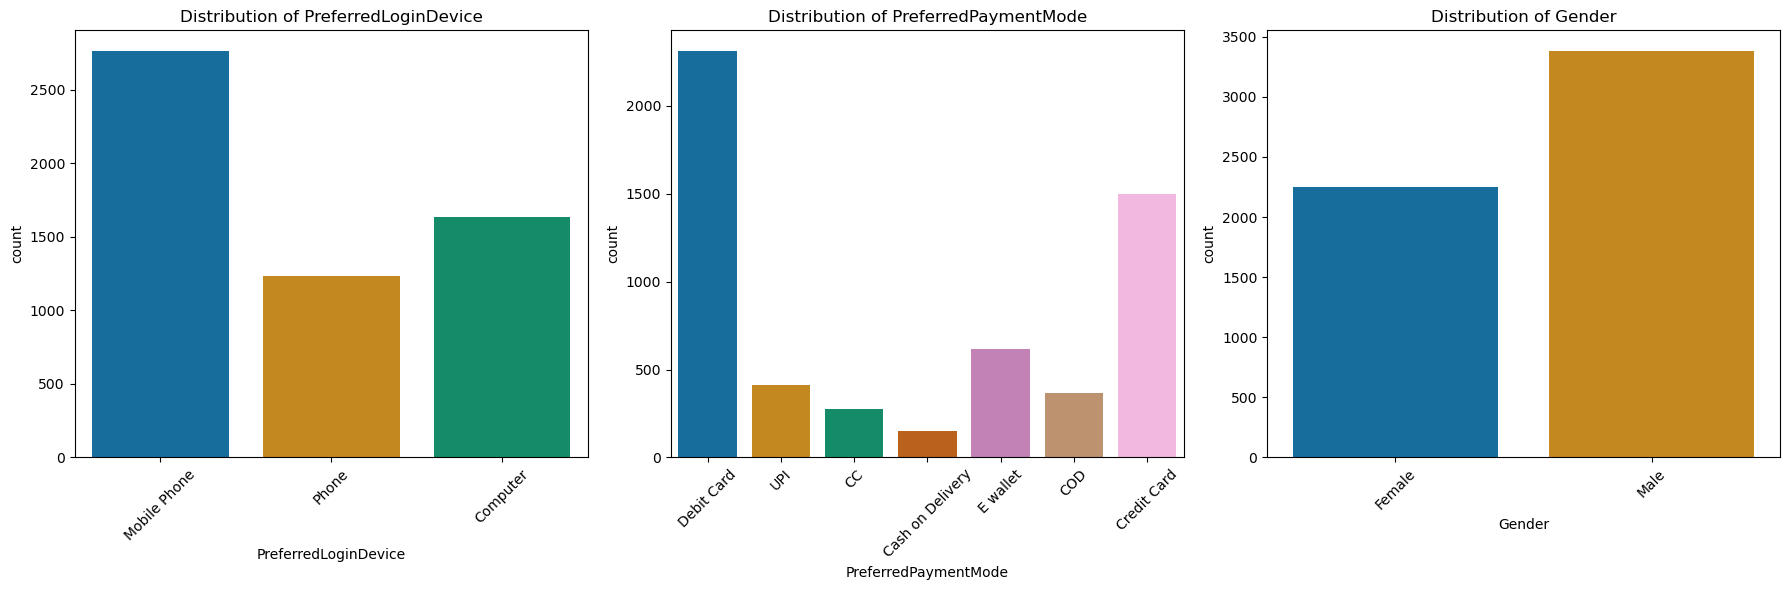

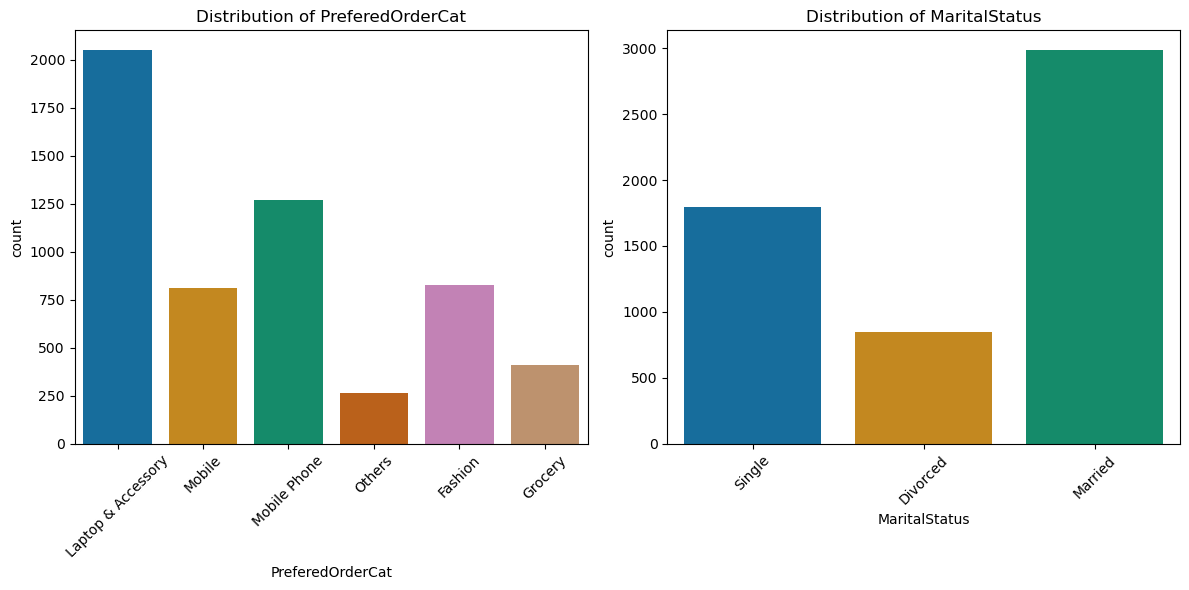

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and columns contain the specified categorical columns
columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

# Configure pandas to display all columns
pd.set_option('display.max_columns', None)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot the distribution of each column
for i, col in enumerate(columns[:3]):
    sns.countplot(x=col, data=df, palette='colorblind', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the distribution of each column
for i, col in enumerate(columns[3:]):
    sns.countplot(x=col, data=df, palette='colorblind', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


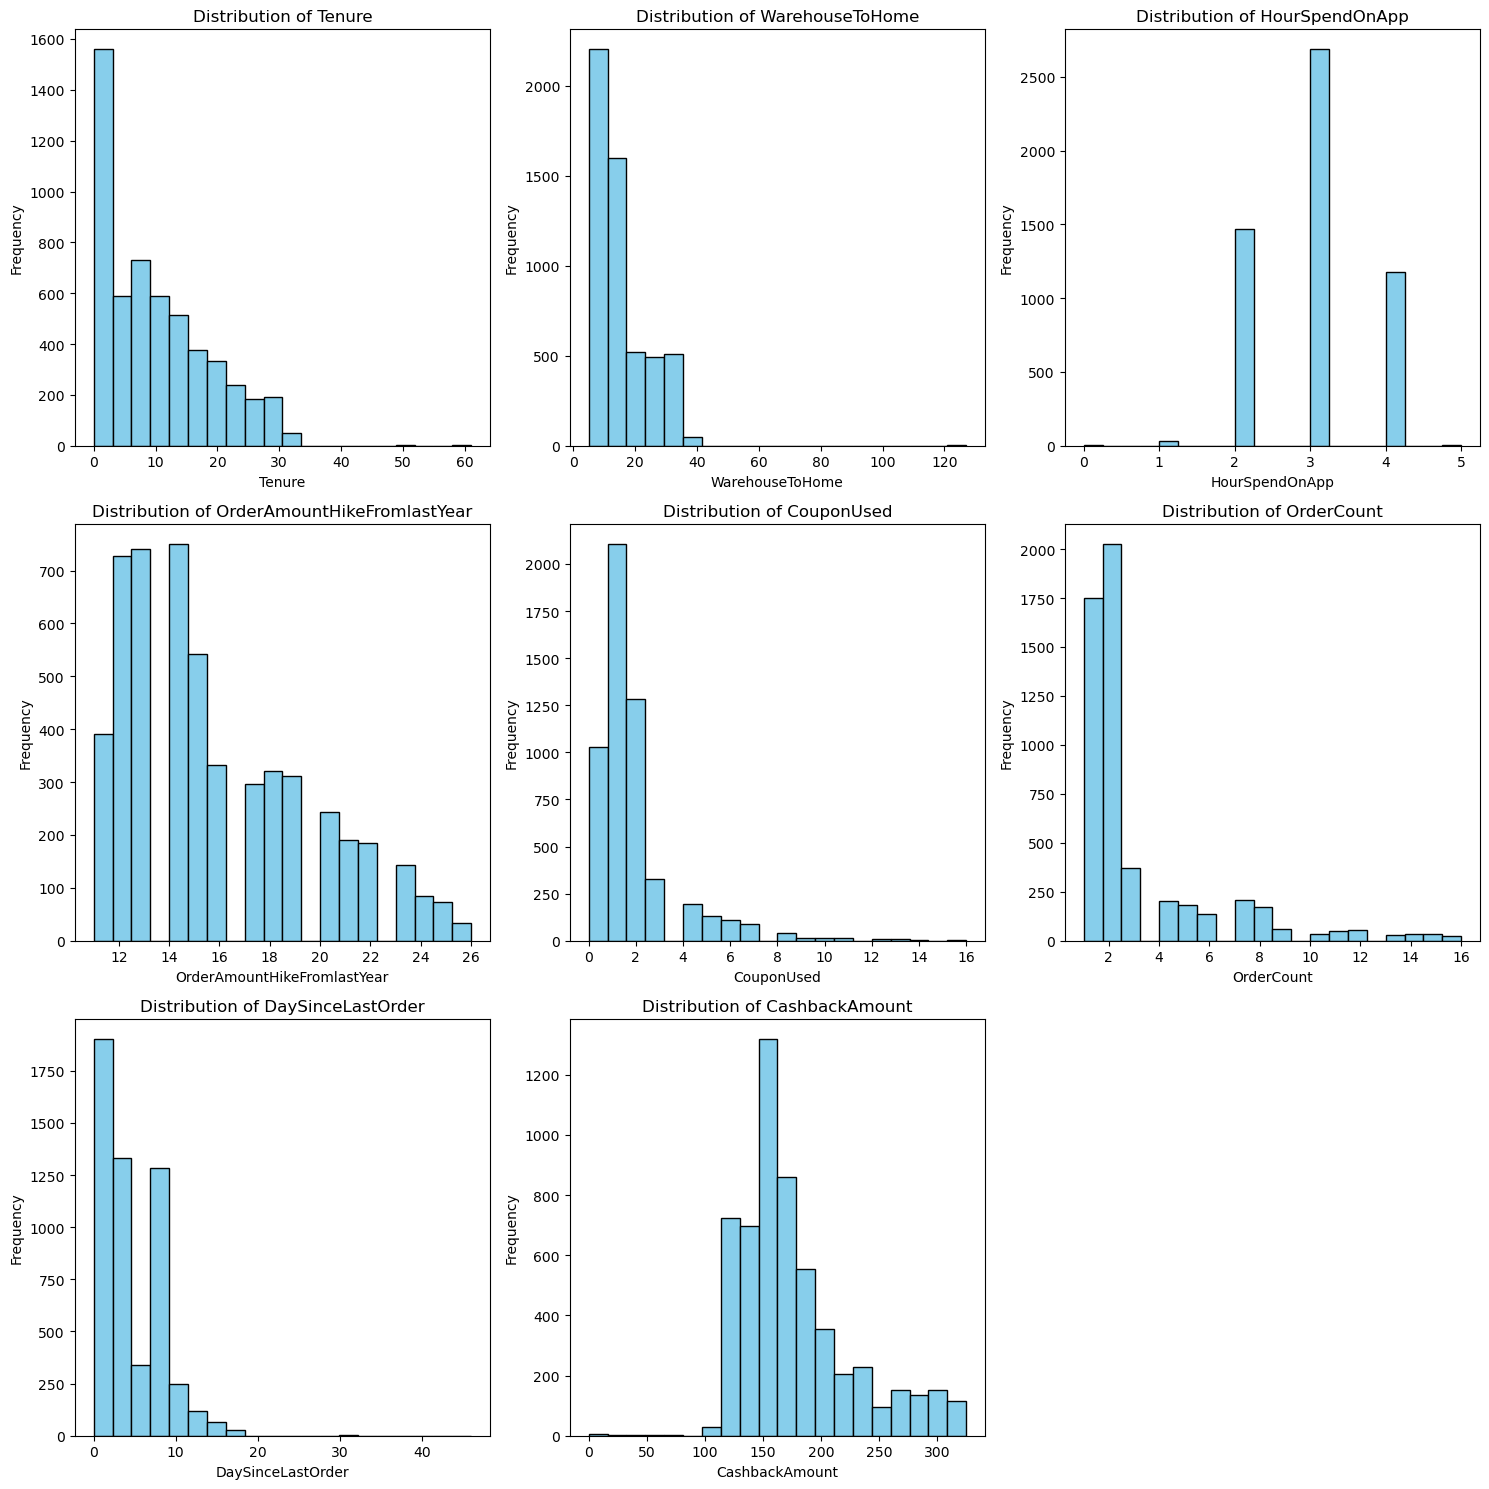

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and num_cols contains the specified numerical columns
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear',
            'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# Configure pandas to display all columns
pd.set_option('display.max_columns', None)

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten the axes array
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(num_cols):
    ax = axes[i]
    ax.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for j in range(len(num_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


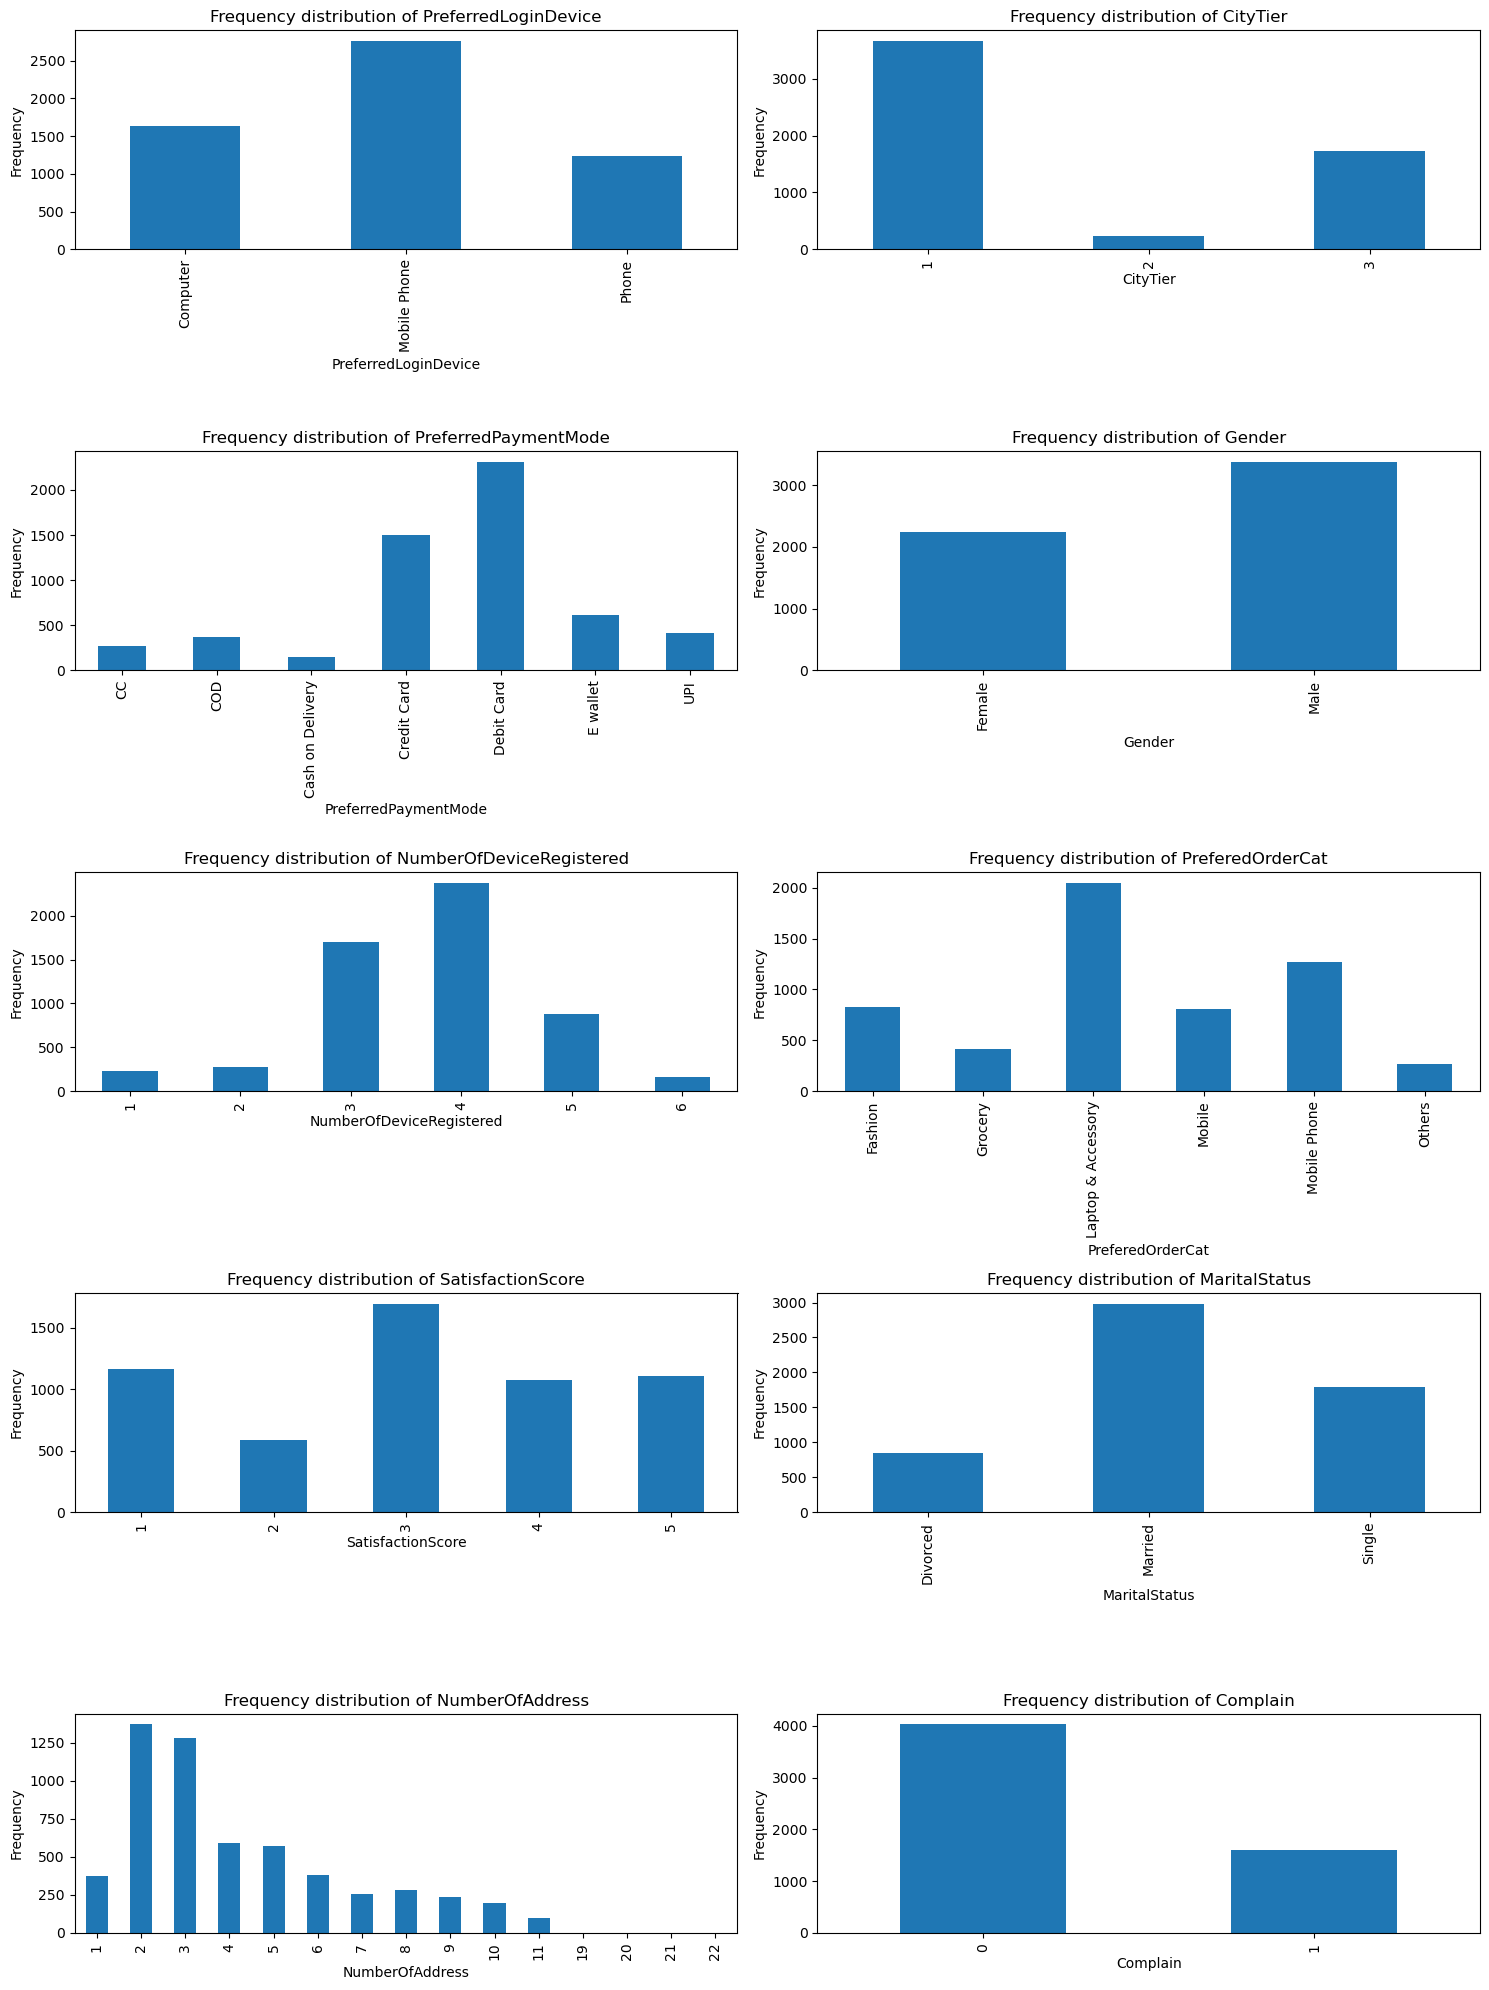

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and cat_cols contain the specified categorical columns
cat_cols = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
            'Gender', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
            'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain']

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot bar plots for each categorical feature
for i, col in enumerate(cat_cols):
    ax = axes[i]
    df[col].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f'Frequency distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Remove empty subplots
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


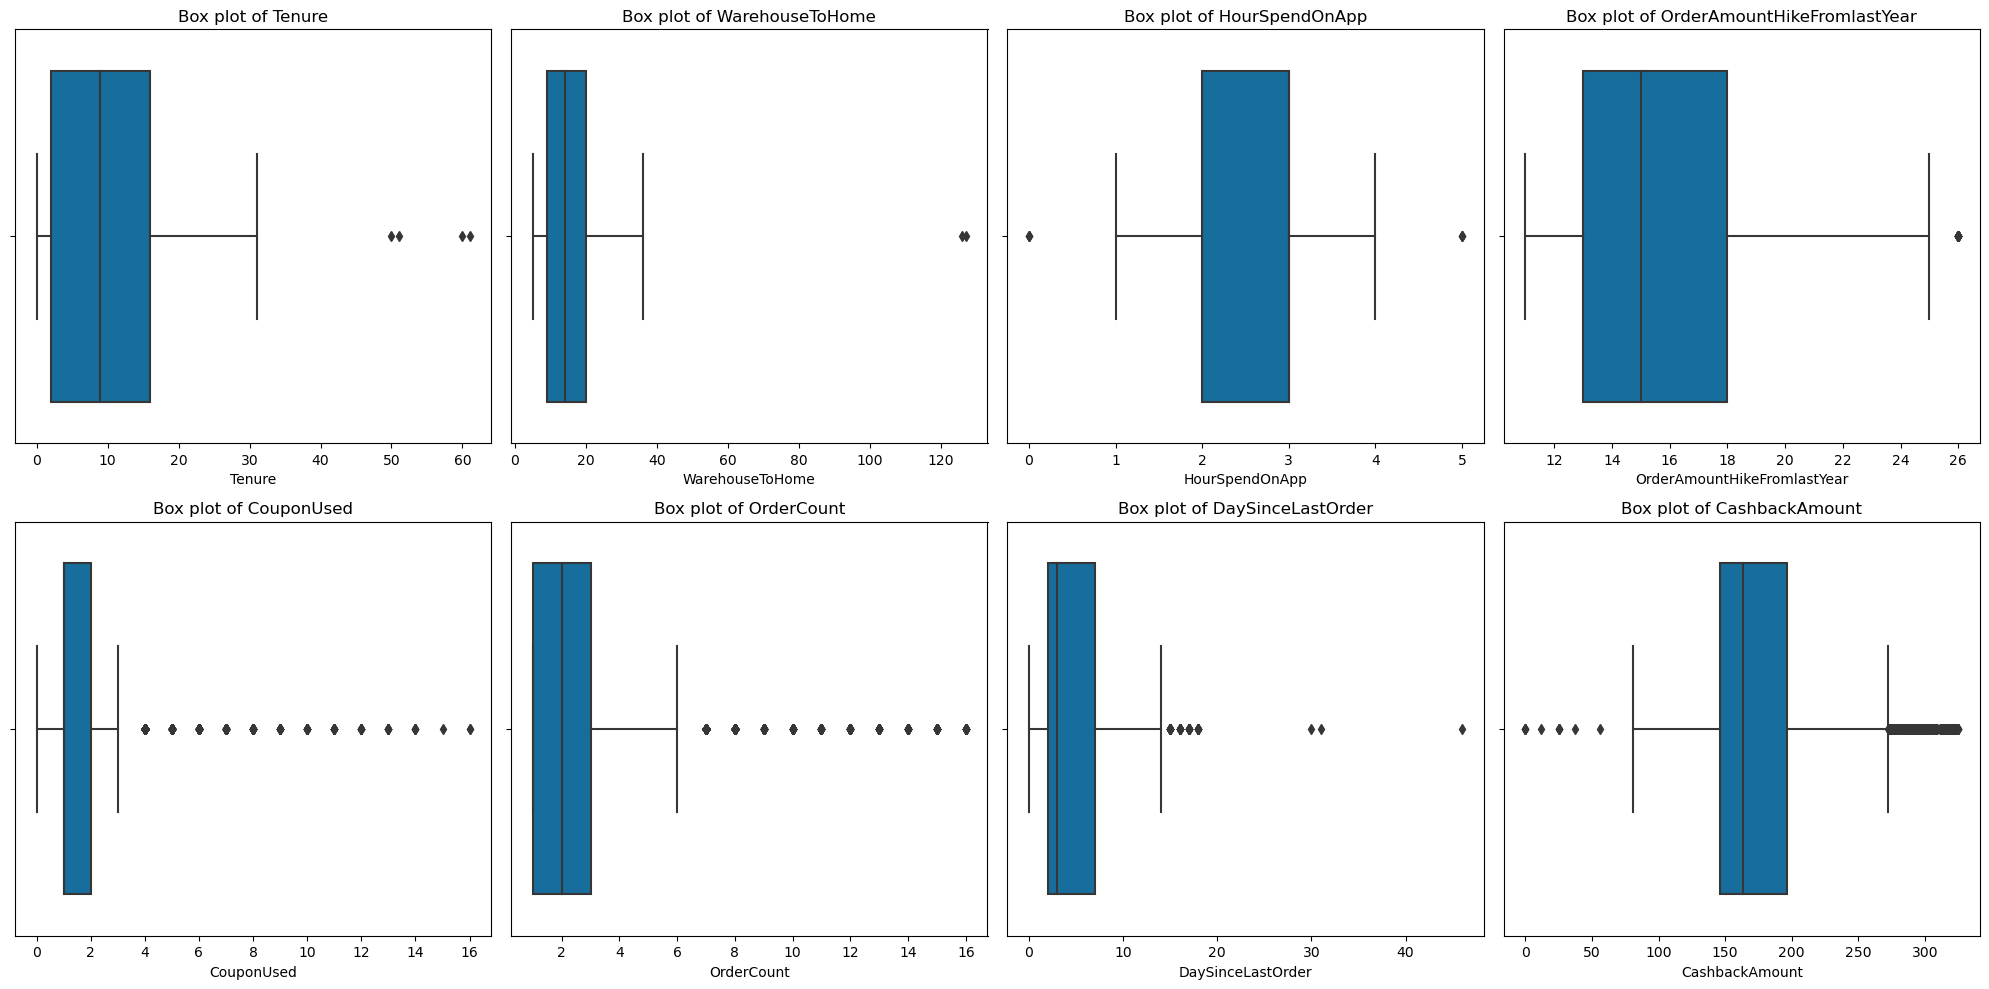

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and num_cols contain the specified numerical columns
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear',
            'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot box plots for each numerical feature
for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], color=None,palette='colorblind')
    axes[i].set_title(f'Box plot of {col}')

plt.tight_layout()
plt.show()


# Business Questions

1. Is there an association between gender and customer churn? Additionally, which gender tends to place more orders?

2. Among different marital statuses, which one exhibits the highest rate of customer churn?

3. Which city tier demonstrates greater customer tenure and order count?

4. Do customers with higher satisfaction scores tend to spend more hours on the app? Is there a correlation between satisfaction score and time spent on the app?

8. Is there any connection between the preferred login device and customer churn?

10. Do different city tiers exhibit preferences for different product categories?

11. What are the preferred payment modes for customers in different city tiers?

12. Among various city tiers, which one has the highest number of orders?

16. Is there any relationship between the preferred order category and the rate of customer churn?

17. Do customers who use more coupons tend to have lower churn rates?

#### 1. Is there an association between gender and customer churn? Additionally, which gender tends to place more orders?

In [ ]:
df['Gender'].value_counts()


Male      3384
Female    2246
Name: Gender, dtype: int64

In [ ]:
df.groupby('Churn')['Gender'].value_counts()

Churn  Gender
0      Male      2784
       Female    1898
1      Male       600
       Female     348
Name: Gender, dtype: int64

<Axes: xlabel='Gender'>

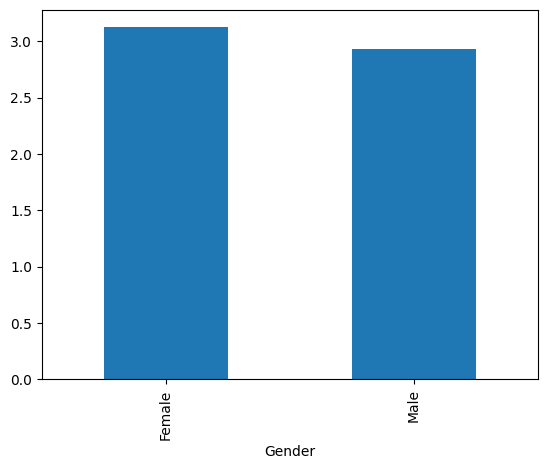

In [ ]:
gender_order = df.groupby('Gender')['OrderCount'].mean().plot(kind='bar')
gender_order

There is not a big difference between the males and the femals,Avergae order

In [ ]:
import plotly.express as px

fig = px.pie(df,values='Churn',names='Gender')
fig.update_traces(marker=dict(colors=['pink','baby blue']))

fig.update_layout(title='Churn Rate by Gender',
                  legend_title = 'Gender')

fig.show()

Upon observation, it appears that there is a higher likelihood of churn among male customers, with approximately 63.3% of churned customers being males. This suggests that the company may want to explore opportunities to expand its product offerings to cater more to the interests of male customers. Additionally, we will investigate whether there are other factors contributing to the highest segment of churned customers being males.

#### 2. Among different marital statuses, which one exhibits the highest rate of customer churn?

In [ ]:
df.groupby('Churn')['MaritalStatus'].value_counts()

Churn  MaritalStatus
0      Married          2642
       Single           1316
       Divorced          724
1      Single            480
       Married           344
       Divorced          124
Name: MaritalStatus, dtype: int64

Text(0, 0.5, 'Churn Rate')

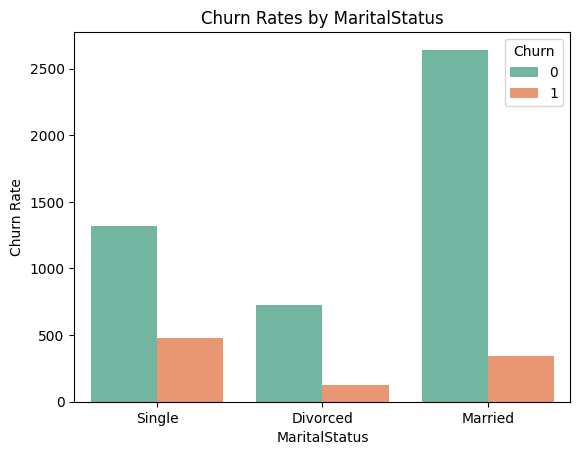

In [ ]:
sns.countplot(x='MaritalStatus',hue='Churn', data=df, palette = 'Set2')
plt.title('Churn Rates by MaritalStatus')
plt.ylabel('Churn Rate')

Married individuals constitute the largest customer segment within the company. Perhaps the company should focus on catering to products that appeal to both single and married customers, especially considering that singles are more prone to churn from the app.

#### 3. Which city tier demonstrates greater customer tenure and order count?


In [ ]:
tenure_grp = df.groupby('CityTier')['Tenure'].agg(['mean','max'])
tenure_grp

,mean,max
CityTier,,
1,10.528818,51.0
2,11.169725,31.0
3,9.361740,61.0


citytier 2 has the highest tenure rate but the tenure rate does not seen to be a strong factor

In [ ]:
orderCount_grp = df.groupby('CityTier')['OrderCount'].agg(['mean','max'])
orderCount_grp

,mean,max
CityTier,,
1,2.953255,16.0
2,2.584034,13.0
3,3.185185,16.0


In [ ]:
df.groupby('CityTier')['OrderCount'].mean()

CityTier
1    2.953255
2    2.584034
3    3.185185
Name: OrderCount, dtype: float64

citytier 3 has the highest order avg but it not to be a strong factor in the customer churning

#### 4. Do customers with higher satisfaction scores tend to spend more hours on the app? Is there a correlation between satisfaction score and time spent on the app?


In [ ]:
fig = px.histogram(df, x='HourSpendOnApp',y='SatisfactionScore',orientation='h',color='Churn', text_auto=True, title='<b> HourSpendOnApp Vs SatisfactionScore', color_discrete_sequence=['#BA1F33','#3A506B','#3E885B'])

fig.update_layout(hovermode='x', title_font_size=30)
fig.update_layout(title_font_color='black',
                  template='plotly',
                  title_font_size=30,
                  hoverlabel_font_size=20,
                  title_x = 0.5,
                  xaxis_title = 'HourSpendOnApp',
                  yaxis_title='SatisfactionScore')

fig.show()


Upon observation, individuals with lower satisfaction scores tend to spend less time on the app compared to those with a satisfaction score of 5. However, I don't believe there is a direct correlation between satisfaction score and the amount of time people spend on the app.

#### 5. Is there any connection between the preferred login device and customer churn?


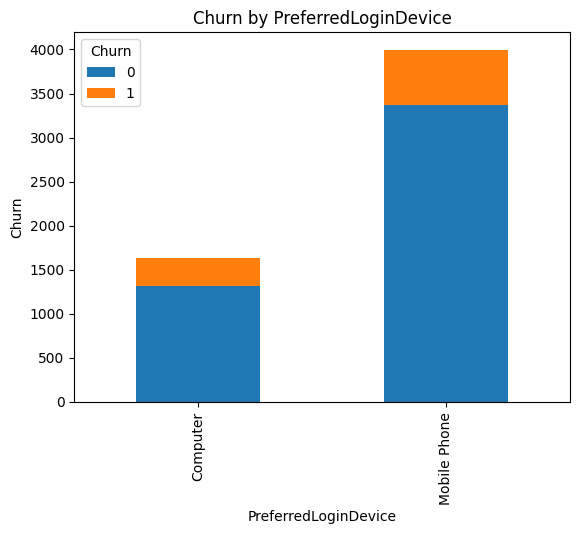

In [ ]:
grp_data = df.groupby(['PreferredLoginDevice','Churn']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Churn by PreferredLoginDevice')
plt.xlabel('PreferredLoginDevice')
plt.ylabel('Churn')

plt.show()


Mobile phone users exhibit a higher likelihood of churn, suggesting a potential issue with the user experience on the mobile app version.

#### 6. Do different city tiers exhibit preferences for different product categories?


In [ ]:

earth_palette = ["#A67C52", "#8F704D", "#B09B71", "#7E786E"]

fig = px.histogram(df, x='PreferedOrderCat', facet_col='CityTier', color='CityTier',color_discrete_sequence=earth_palette,text_auto= True , title="<b>"+'CityTier Vs PreferedOrderCat')

fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferredPaymentMode',
yaxis_title='count',
)
fig.show()

laptop & accesories and mobile phones are the prefered category for all the city tiers




In [ ]:
df2 = df.copy()

#### 7. What are the preferred payment modes for customers in different city tiers?

In [ ]:

df2['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

In [ ]:
df2.groupby('CityTier')['PreferredPaymentMode'].value_counts()

CityTier  PreferredPaymentMode
1         Debit Card              1676
          Credit Card             1382
          Cash on Delivery         366
          UPI                      242
2         UPI                      114
          Debit Card                62
          Credit Card               50
          Cash on Delivery          16
3         E wallet                 614
          Debit Card               576
          Credit Card              342
          Cash on Delivery         132
          UPI                       58
Name: PreferredPaymentMode, dtype: int64

In [ ]:
# color palettes
pie_palette = ['#3E885B','#7694B6','#85BDA6', '#80AEBD', '#2F4B26', '#3A506B']
green_palette = ['#2F4B26', '#3E885B', '#85BDA6', '#BEDCFE', '#C0D7BB']
blue_palette = ['#3A506B', '#7694B6', '#80AEBD', '#5BC0BE', '#3E92CC']
custom_palette = ['#3A506B', '#7694B6', '#80AEBD', '#3E885B', '#85BDA6']
red_palette = ['#410B13', '#CD5D67', '#BA1F33', '#421820', '#91171F']

In [ ]:

fig=px.histogram(df2,x="PreferredPaymentMode",facet_col="CityTier",color="CityTier",color_discrete_sequence=red_palette,text_auto= True , title="<b>"+'CityTier Vs PaymentMethod')


fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferredPaymentMode',
yaxis_title='count',
)
fig.show()

### Preferred payment methods vary based on city tier:

* In CityTier 1, the preferred payment method is Debit Card.

* In CityTier 2, the preferred payment method is UPI.
* In CityTier 3, the preferred payment method is E-wallet

#### 8. Among various city tiers, which one has the highest number of orders?


In [ ]:

df2.groupby('CityTier')['OrderCount'].sum()

CityTier
1    10298.0
2      615.0
3     5246.0
Name: OrderCount, dtype: float64

In [ ]:
fig = px.histogram(df2, x="OrderCount", y="CityTier", orientation="h", color="CityTier" ,text_auto= True , title="<b>"+'CityTier Vs Sum of OrderCount' , color_discrete_sequence = ['#BA1F33','#3A506B','#3E885B'])


fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Sum of OrderCount',
yaxis_title='count',
)
fig.show()

### CityTier 1 has the highest order count, with a total of 10,298 orders.

#### 9. Is there any relationship between the preferred order category and the rate of customer churn?


In [ ]:

df2.groupby(['PreferedOrderCat','Gender'])[['CustomerID']].count()

CustomerID
PreferedOrderCat   Gender            
Fashion            Female         354
                   Male           472
Grocery            Female         198
                   Male           212
Laptop & Accessory Female         844
                   Male          1206
Mobile Phone       Female         764
                   Male          1316
Others             Female          86
                   Male           178

In [ ]:
# Group and count by 'PreferedOrderCat' and 'Churn'
ordercat_churnrate = pd.DataFrame(df2.groupby('PreferedOrderCat')['Gender'].value_counts())
ordercat_churnrate = ordercat_churnrate.rename(columns={'Gender': 'Count'})
ordercat_churnrate = ordercat_churnrate.reset_index()


fig = px.histogram(ordercat_churnrate, x='PreferedOrderCat', y = 'Count',color='Gender', barmode='group',color_discrete_sequence=pie_palette,title="<b>"+'Prefered Category Vs Gender', barnorm = "percent",text_auto= True)
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferedOrderCat',
yaxis_title='count',
)
fig.show()

#### Top 2 Preferd Category For Males  > [ Others , Mobile Phone ]
#### Top 2 Preferd Category For Females  > [ Grocery , Fashion ]

#### 10. Do customers who use more coupons tend to have lower churn rates?

In [ ]:

df2.groupby(['CouponUsed' , 'Churn'])[['CustomerID']].count()

CustomerID
CouponUsed Churn            
0.0        0             844
           1             186
1.0        0            1727
           1             378
2.0        0            1061
           1             222
3.0        0             281
           1              46
4.0        0             167
           1              30
5.0        0             106
           1              23
6.0        0              90
           1              18
7.0        0              71
           1              18
8.0        0              33
           1               9
9.0        0              11
           1               2
10.0       0              11
           1               3
11.0       0              10
           1               2
12.0       0               8
           1               1
13.0       0               8
14.0       0               5
15.0       1               1
16.0       0               1
           1               1

In [ ]:
# Group and count by 'Coup' and 'Churn'
coupoun_churnrate = pd.DataFrame(df2.groupby('CouponUsed')['Churn'].value_counts())
coupoun_churnrate = coupoun_churnrate.rename(columns={'Churn': 'Count'})
coupoun_churnrate = coupoun_churnrate.reset_index()


fig = px.bar(coupoun_churnrate, x='CouponUsed', y='Count', color='Churn', barmode='stack',
             color_discrete_sequence=['rgba(58, 71, 80, 0.6)', 'rgba(246, 78, 139, 1.0)'],
             title="<b>" + 'CouponUsed Vs Churn Rate', text_auto=True)
fig.update_layout(hovermode='x', title_font_size=30)
fig.update_layout(
    title_font_color="black",
    template="plotly",
    title_font_size=30,
    hoverlabel_font_size=20,
    title_x=0.5,
    xaxis_title='CouponUsed',
    yaxis_title='Count',
    bargroupgap=0.2  # Adjust the bar group gap here
)
fig.show()


#### Grpah shows Churn become less when more coupons used

# Data Preprocessing

In [ ]:
df.isnull().sum()*100 / df.shape[0]

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

<Axes: >

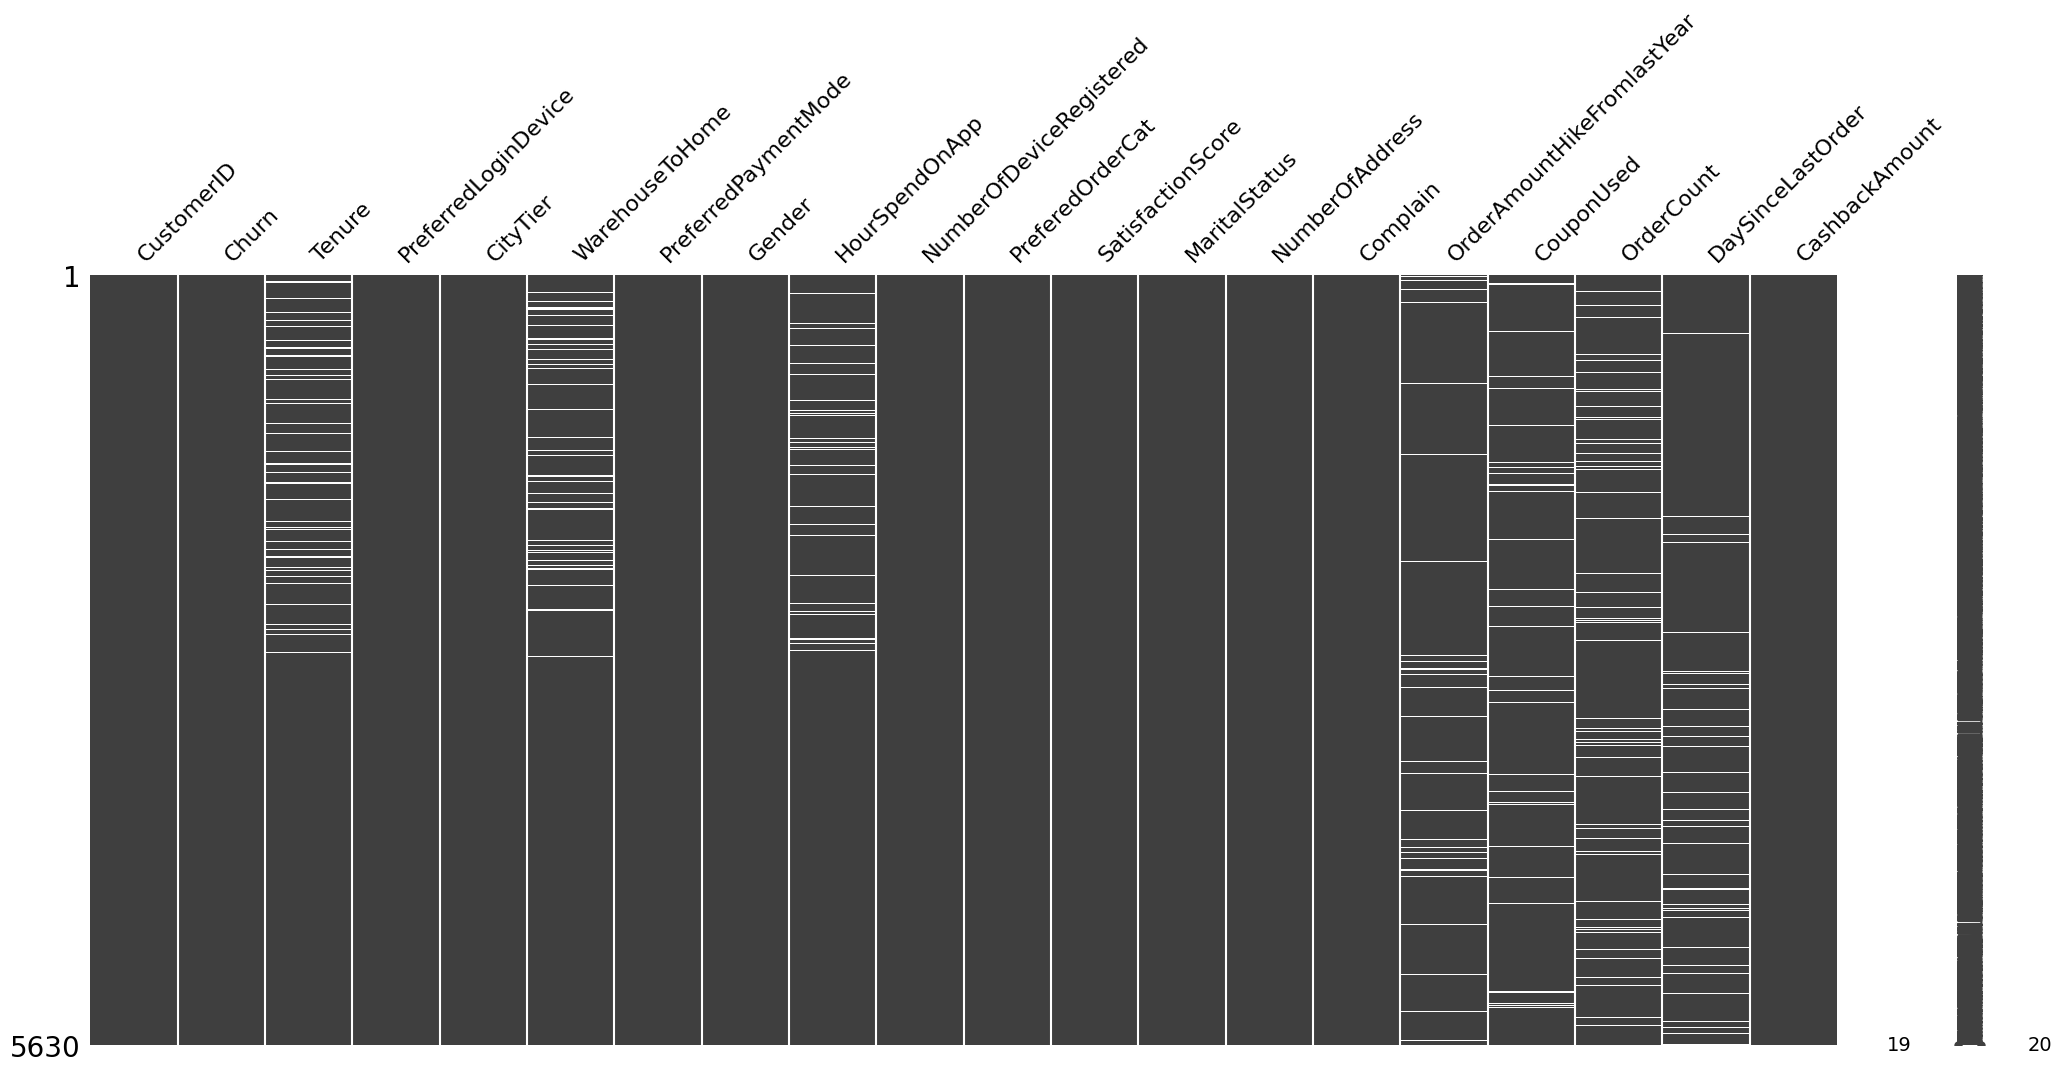

In [ ]:
import missingno as msno

msno.matrix(df)

<Axes: >

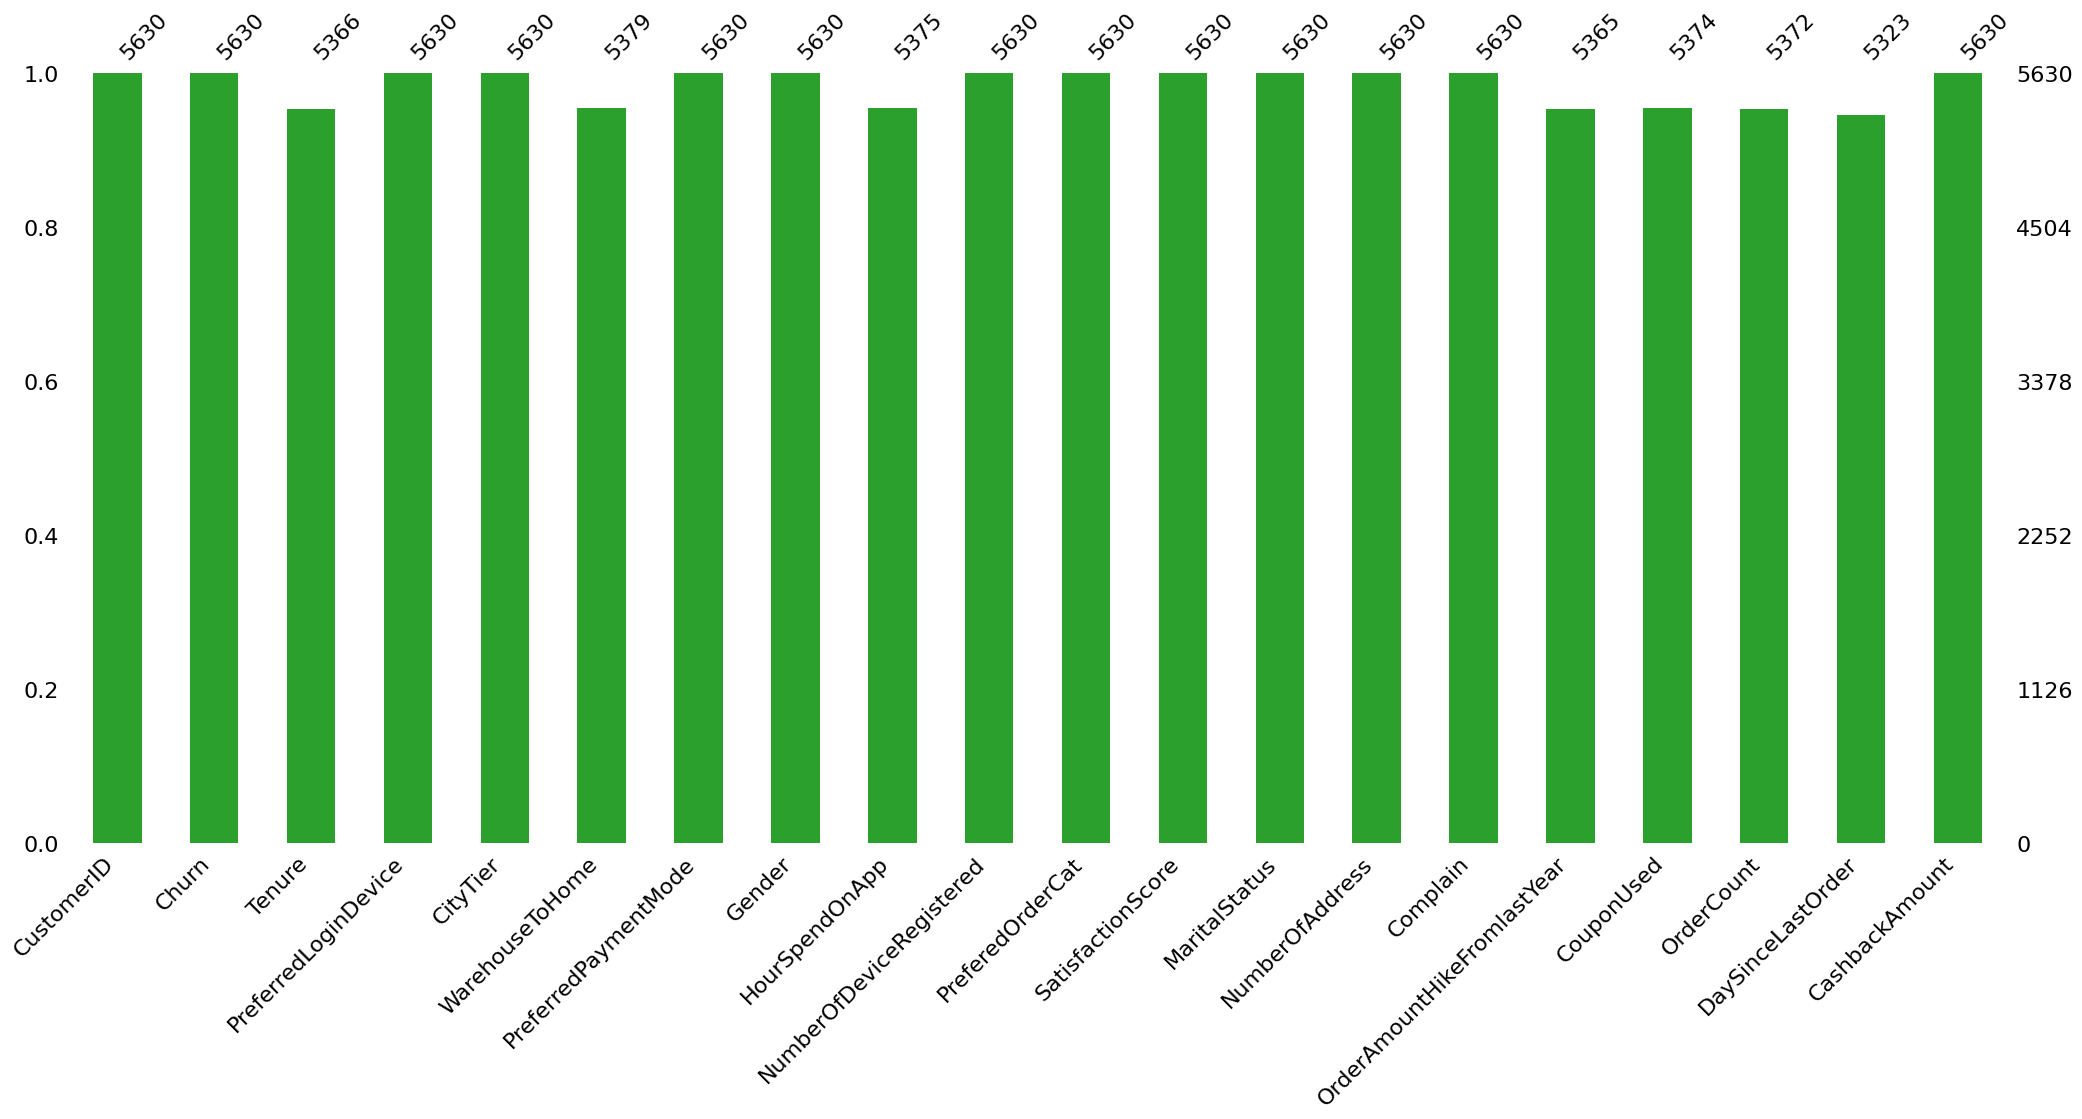

In [ ]:
msno.bar(df, color='tab:green')

## Outliers Detection

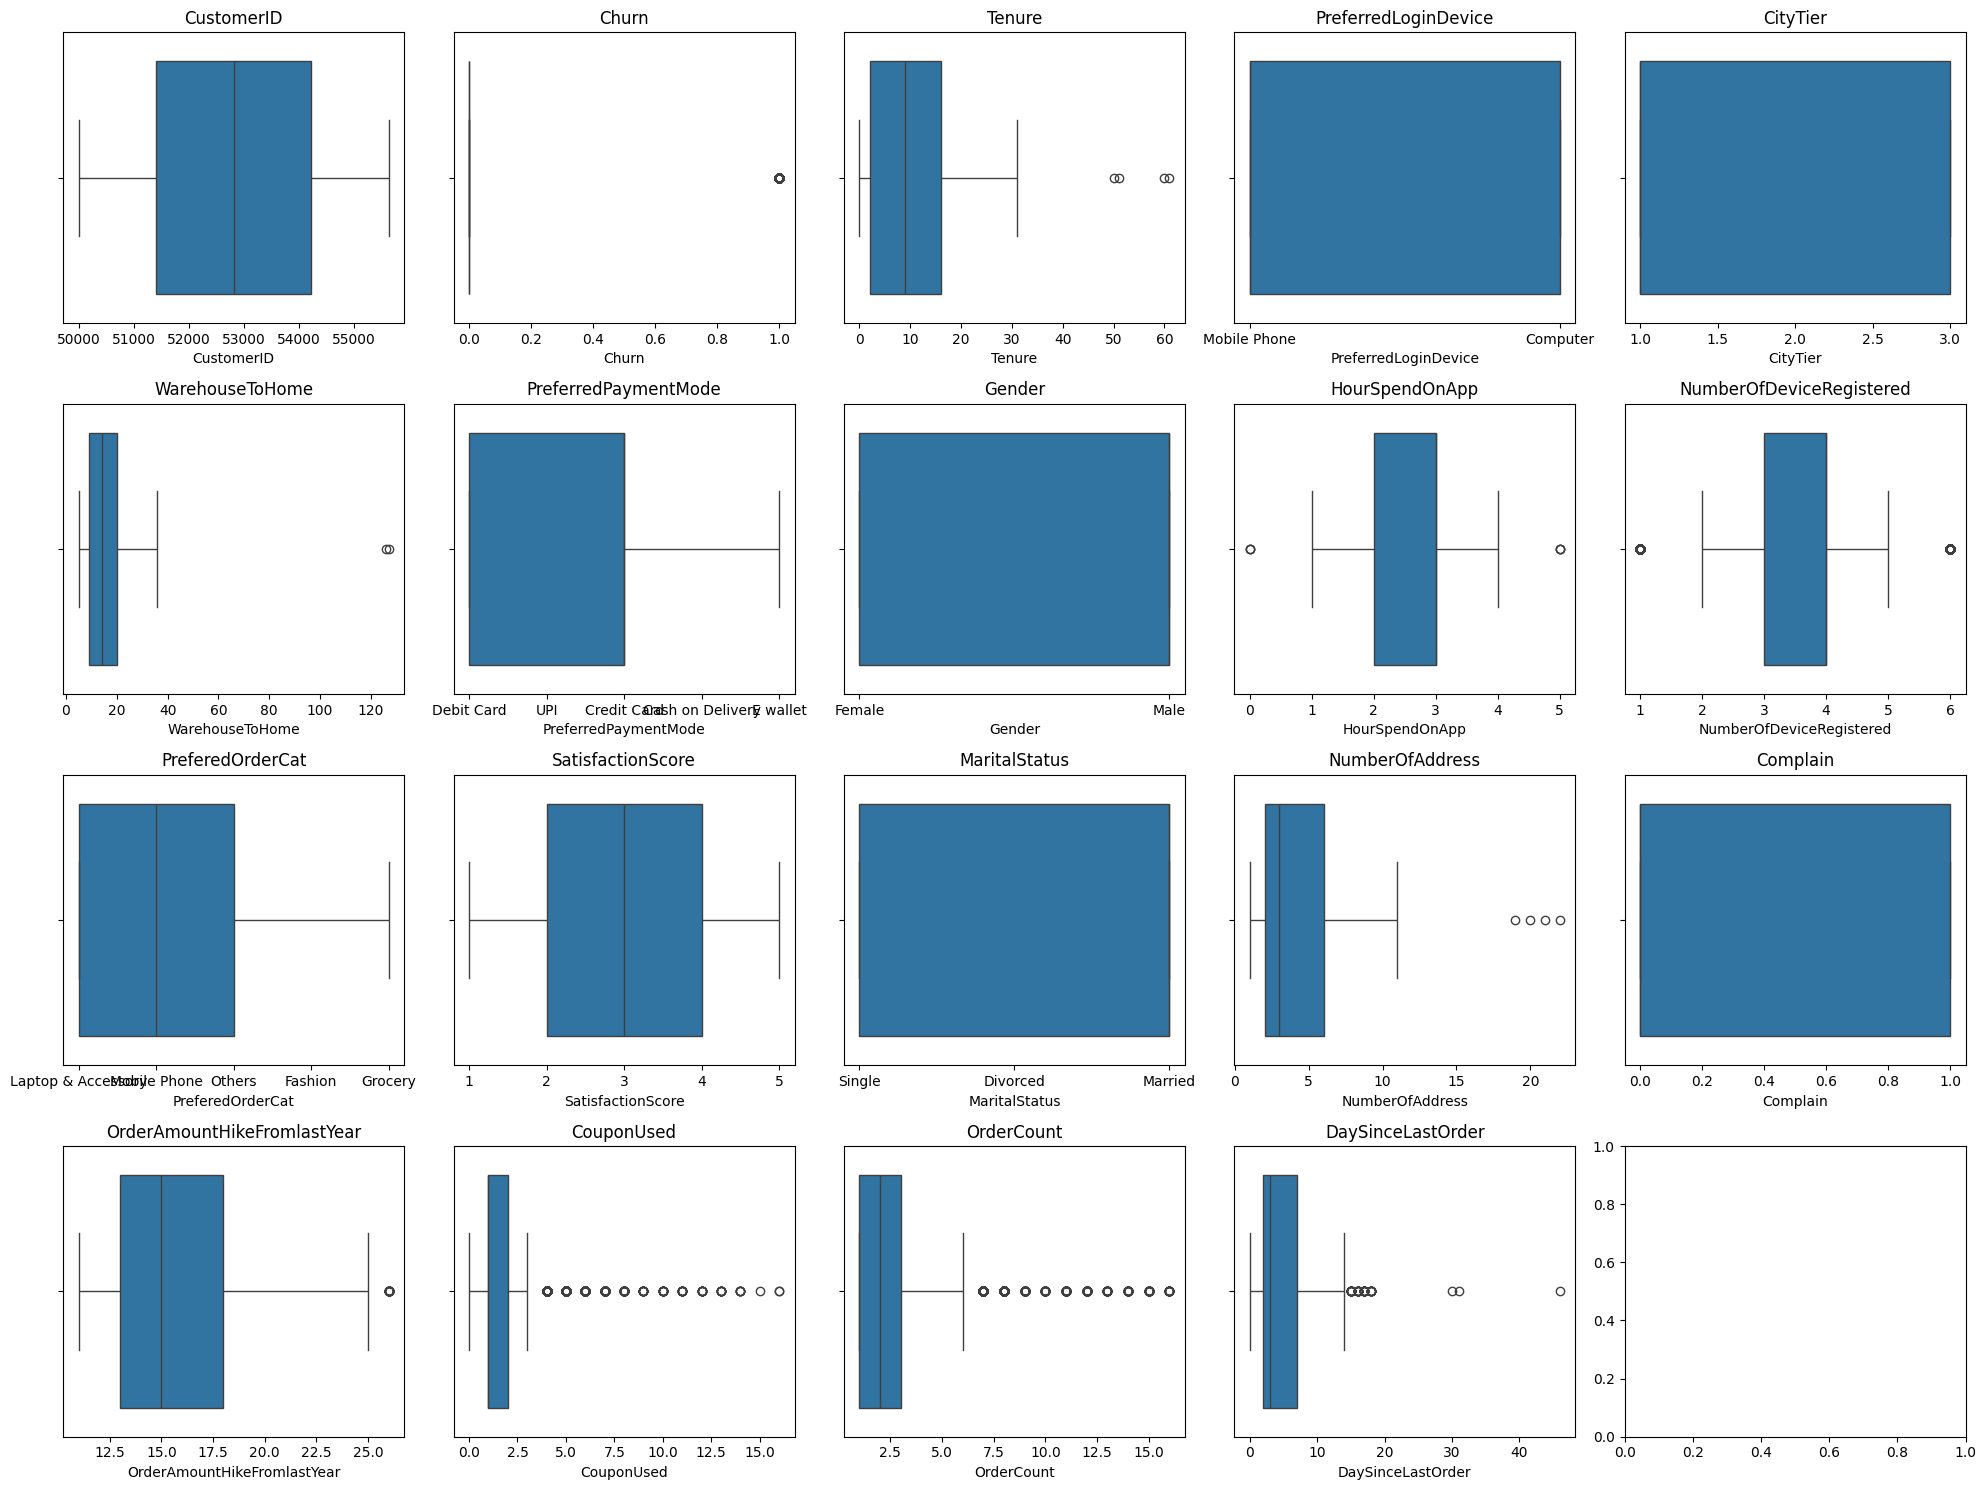

In [ ]:

columns_to_plot = df.columns[:19]  # Select the first 20 columns to plot

# Create subplots with multiple axes
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))

# Flatten axes into a 1D array for easy iteration
axes = axes.flatten()

# Plot each column as a boxplot on a separate axis
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [ ]:
#outlier %

In [ ]:
# Define threshold for outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Calculate outlier percentage for each numerical column
outlier_percentage = {}

# Define numerical columns
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()

for column in numerical_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    # Count outliers
    outliers_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column].count()

    # Calculate percentage of outliers
    percentage = outliers_count / df[column].count() * 100
    outlier_percentage[column] = percentage

# Display outlier percentage for each numerical column
for column, percentage in outlier_percentage.items():
    print(f"{column}: {percentage:.2f}%")


CustomerID: 0.00%
Churn: 16.84%
Tenure: 0.07%
CityTier: 0.00%
WarehouseToHome: 0.04%
HourSpendOnApp: 0.11%
NumberOfDeviceRegistered: 7.05%
SatisfactionScore: 0.00%
NumberOfAddress: 0.07%
Complain: 0.00%
OrderAmountHikeFromlastYear: 0.62%
CouponUsed: 11.70%
OrderCount: 13.09%
DaySinceLastOrder: 1.16%
CashbackAmount: 7.78%


In [ ]:
# Calculate total outlier percentage across all numerical columns
total_outlier_percentage = sum(outlier_percentage.values()) / len(numerical_columns)

print(f"Total outlier percentage across all numerical columns: {total_outlier_percentage:.2f}%")


Total outlier percentage across all numerical columns: 3.90%


In [ ]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

### Capping

In [ ]:
df['Churn'] = df['Churn'].astype(bool)

# Get numerical columns
numerical_columns = df.select_dtypes(include=np.number).columns

# Define the threshold multiplier for capping
threshold_multiplier = 1.5

# Loop through each numerical column and apply capping
for col_name in numerical_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define lower and upper bounds for capping
    lower_bound = Q1 - threshold_multiplier * IQR
    upper_bound = Q3 + threshold_multiplier * IQR

    # Cap outliers below the lower bound
    df[col_name] = np.where(df[col_name] < lower_bound, lower_bound, df[col_name])

    # Cap outliers above the upper bound
    df[col_name] = np.where(df[col_name] > upper_bound, upper_bound, df[col_name])


The code employs a capping technique to handle outliers in numerical columns of the dataset, effectively setting upper and lower bounds based on quartiles and the Interquartile Range (IQR). By mitigating the impact of outliers, the code enhances the reliability of data preprocessing and ensures the integrity of statistical analysis and machine learning models in the project.

In [ ]:
df['Churn'] = df['Churn'].astype('int64')

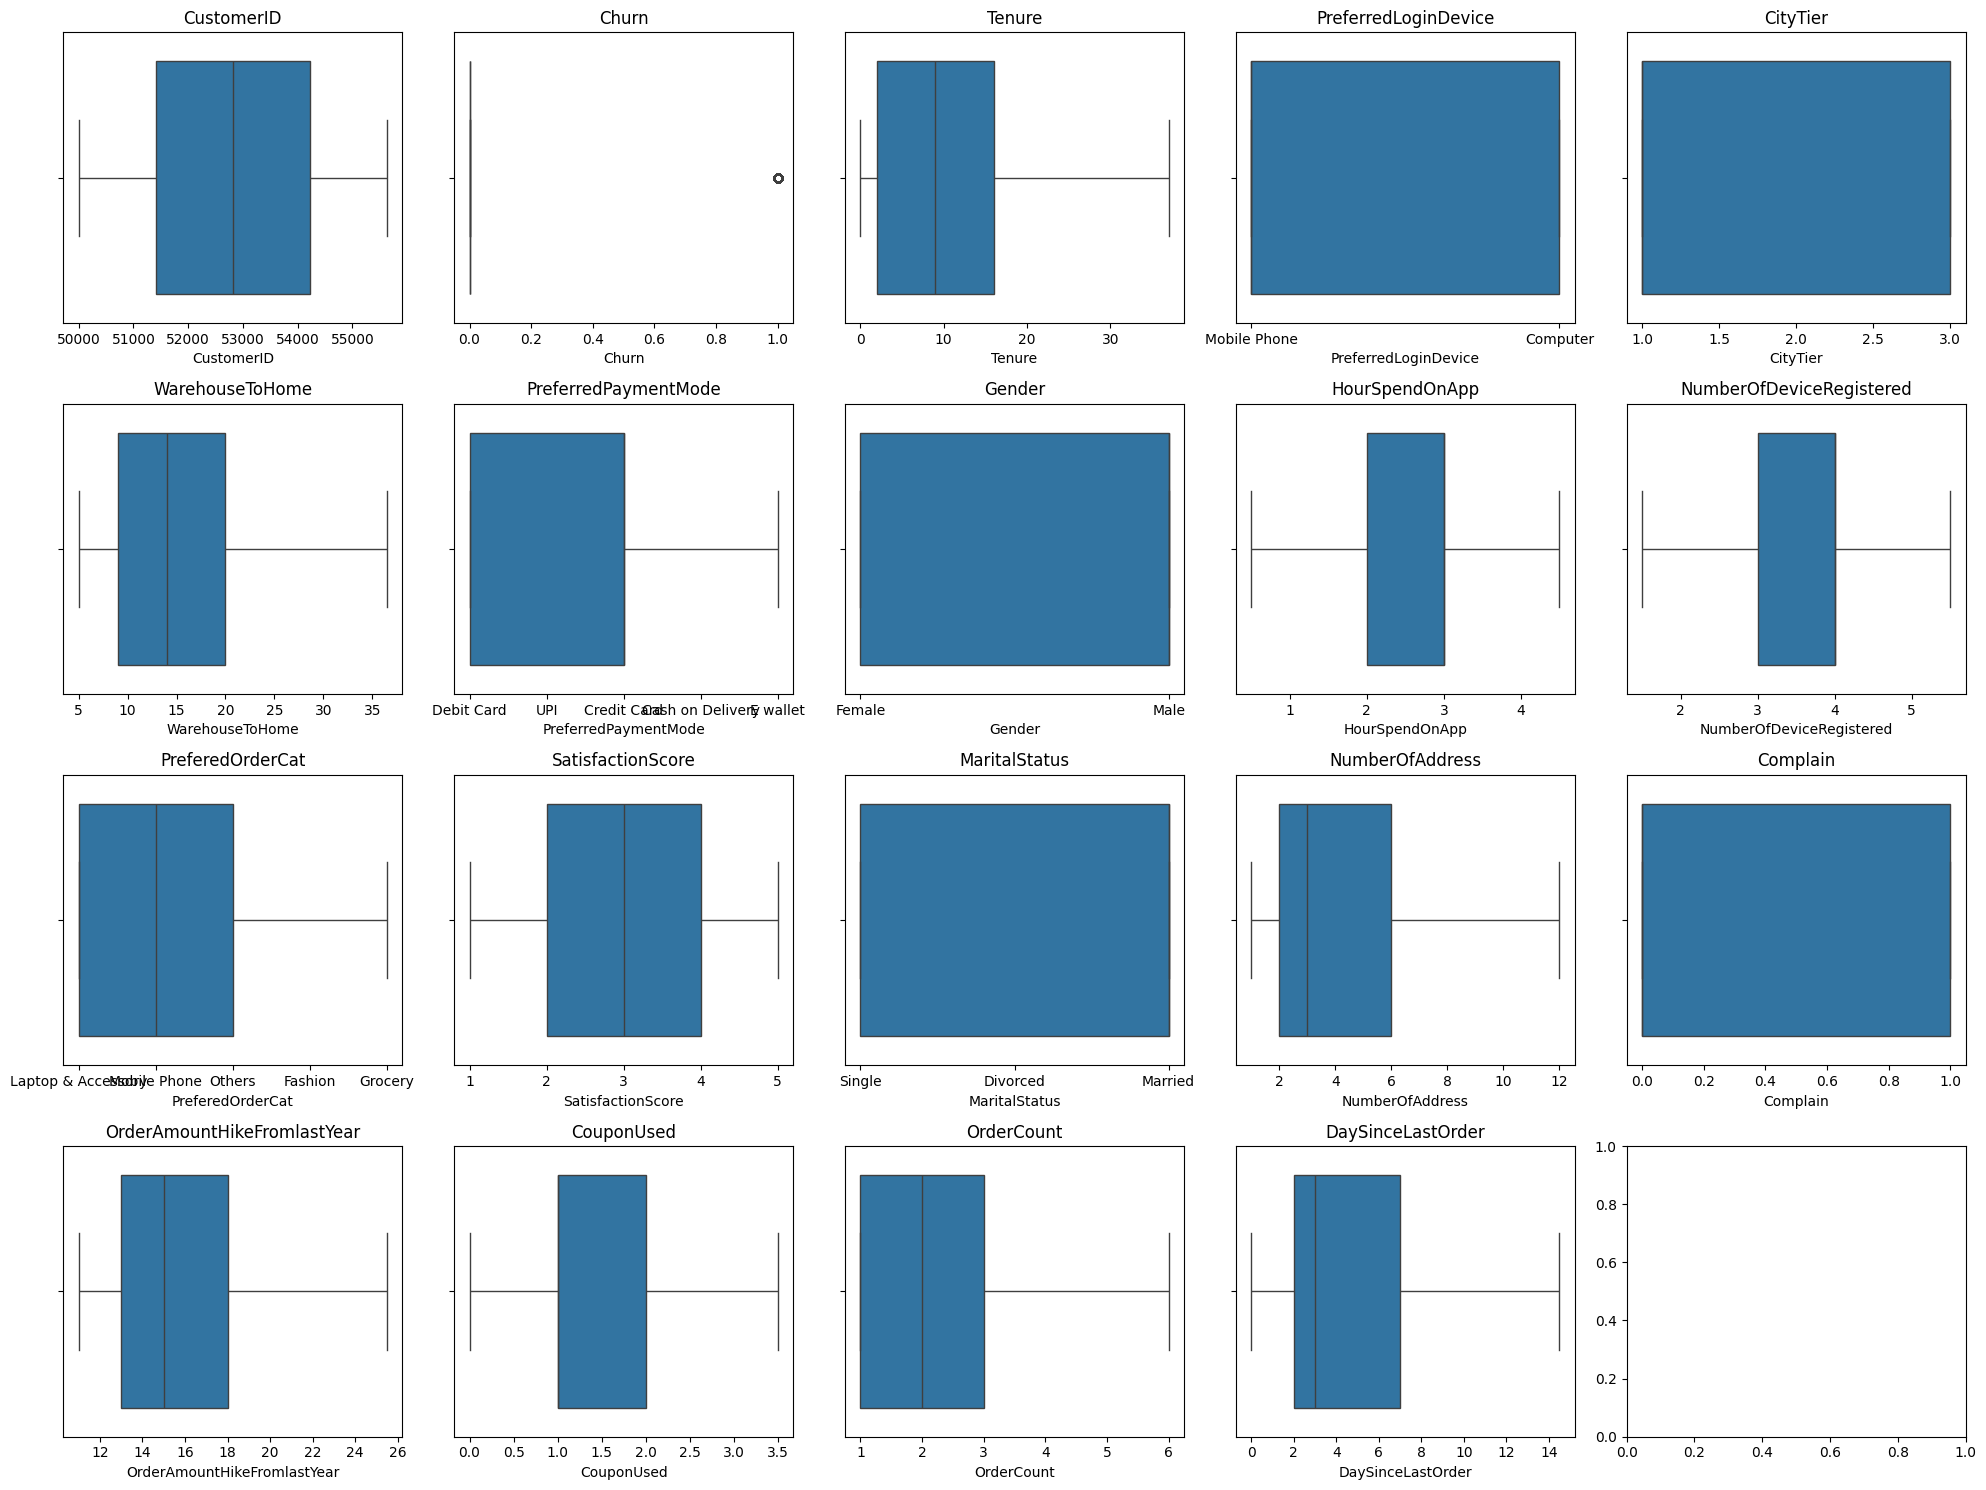

In [ ]:

columns_to_plot = df.columns[:19]  # Select the first 20 columns to plot

# Create subplots with multiple axes
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))

# Flatten axes into a 1D array for easy iteration
axes = axes.flatten()

# Plot each column as a boxplot on a separate axis
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [ ]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

numerical_columns = df.select_dtypes(include=np.number).columns

# Create SimpleImputer object
imputer = SimpleImputer(strategy='median')

# Fit and transform the data
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])


In [ ]:
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [ ]:
df.to_excel('output.xlsx',index=False)

In [ ]:
df.drop(columns='CustomerID',inplace=True)

In [ ]:
df.shape

(5630, 19)

In [ ]:
categorical_features = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
                        'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']

# View unique values with counts for each categorical feature
for feature in categorical_features:
    unique_values_count = df[feature].value_counts()
    print(f"Unique values with counts for '{feature}':\n{unique_values_count}\n")
    print('*'*40)

Unique values with counts for 'PreferredLoginDevice':
Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

****************************************
Unique values with counts for 'CityTier':
1.0    3666
3.0    1722
2.0     242
Name: CityTier, dtype: int64

****************************************
Unique values with counts for 'PreferredPaymentMode':
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

****************************************
Unique values with counts for 'Gender':
Male      3384
Female    2246
Name: Gender, dtype: int64

****************************************
Unique values with counts for 'PreferedOrderCat':
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

****************************************
Unique 

In [ ]:
df.to_excel('output.xlsx',index=False)

In [ ]:
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [ ]:
cat_cols = df[df.select_dtypes(include='O').columns]
cat_cols

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Mobile Phone,UPI,Male,Mobile Phone,Single
2,Mobile Phone,Debit Card,Male,Mobile Phone,Single
3,Mobile Phone,Debit Card,Male,Laptop & Accessory,Single
4,Mobile Phone,Credit Card,Male,Mobile Phone,Single
...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married
5626,Mobile Phone,Credit Card,Male,Fashion,Married
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Computer,Credit Card,Male,Laptop & Accessory,Married


In [ ]:
### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])


In [ ]:
df.head(3)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1.0,4.000000,1,3.0,6.0,2,0,3.0,3.0,2,2.0,2,9.0,1.0,11.0,1.0,1.0,5.0,159.93
1,1.0,10.176109,1,1.0,8.0,4,1,3.0,4.0,3,3.0,2,7.0,1.0,15.0,0.0,1.0,0.0,120.90
2,1.0,10.176109,1,1.0,30.0,2,1,2.0,4.0,3,3.0,2,6.0,1.0,14.0,0.0,1.0,3.0,120.28


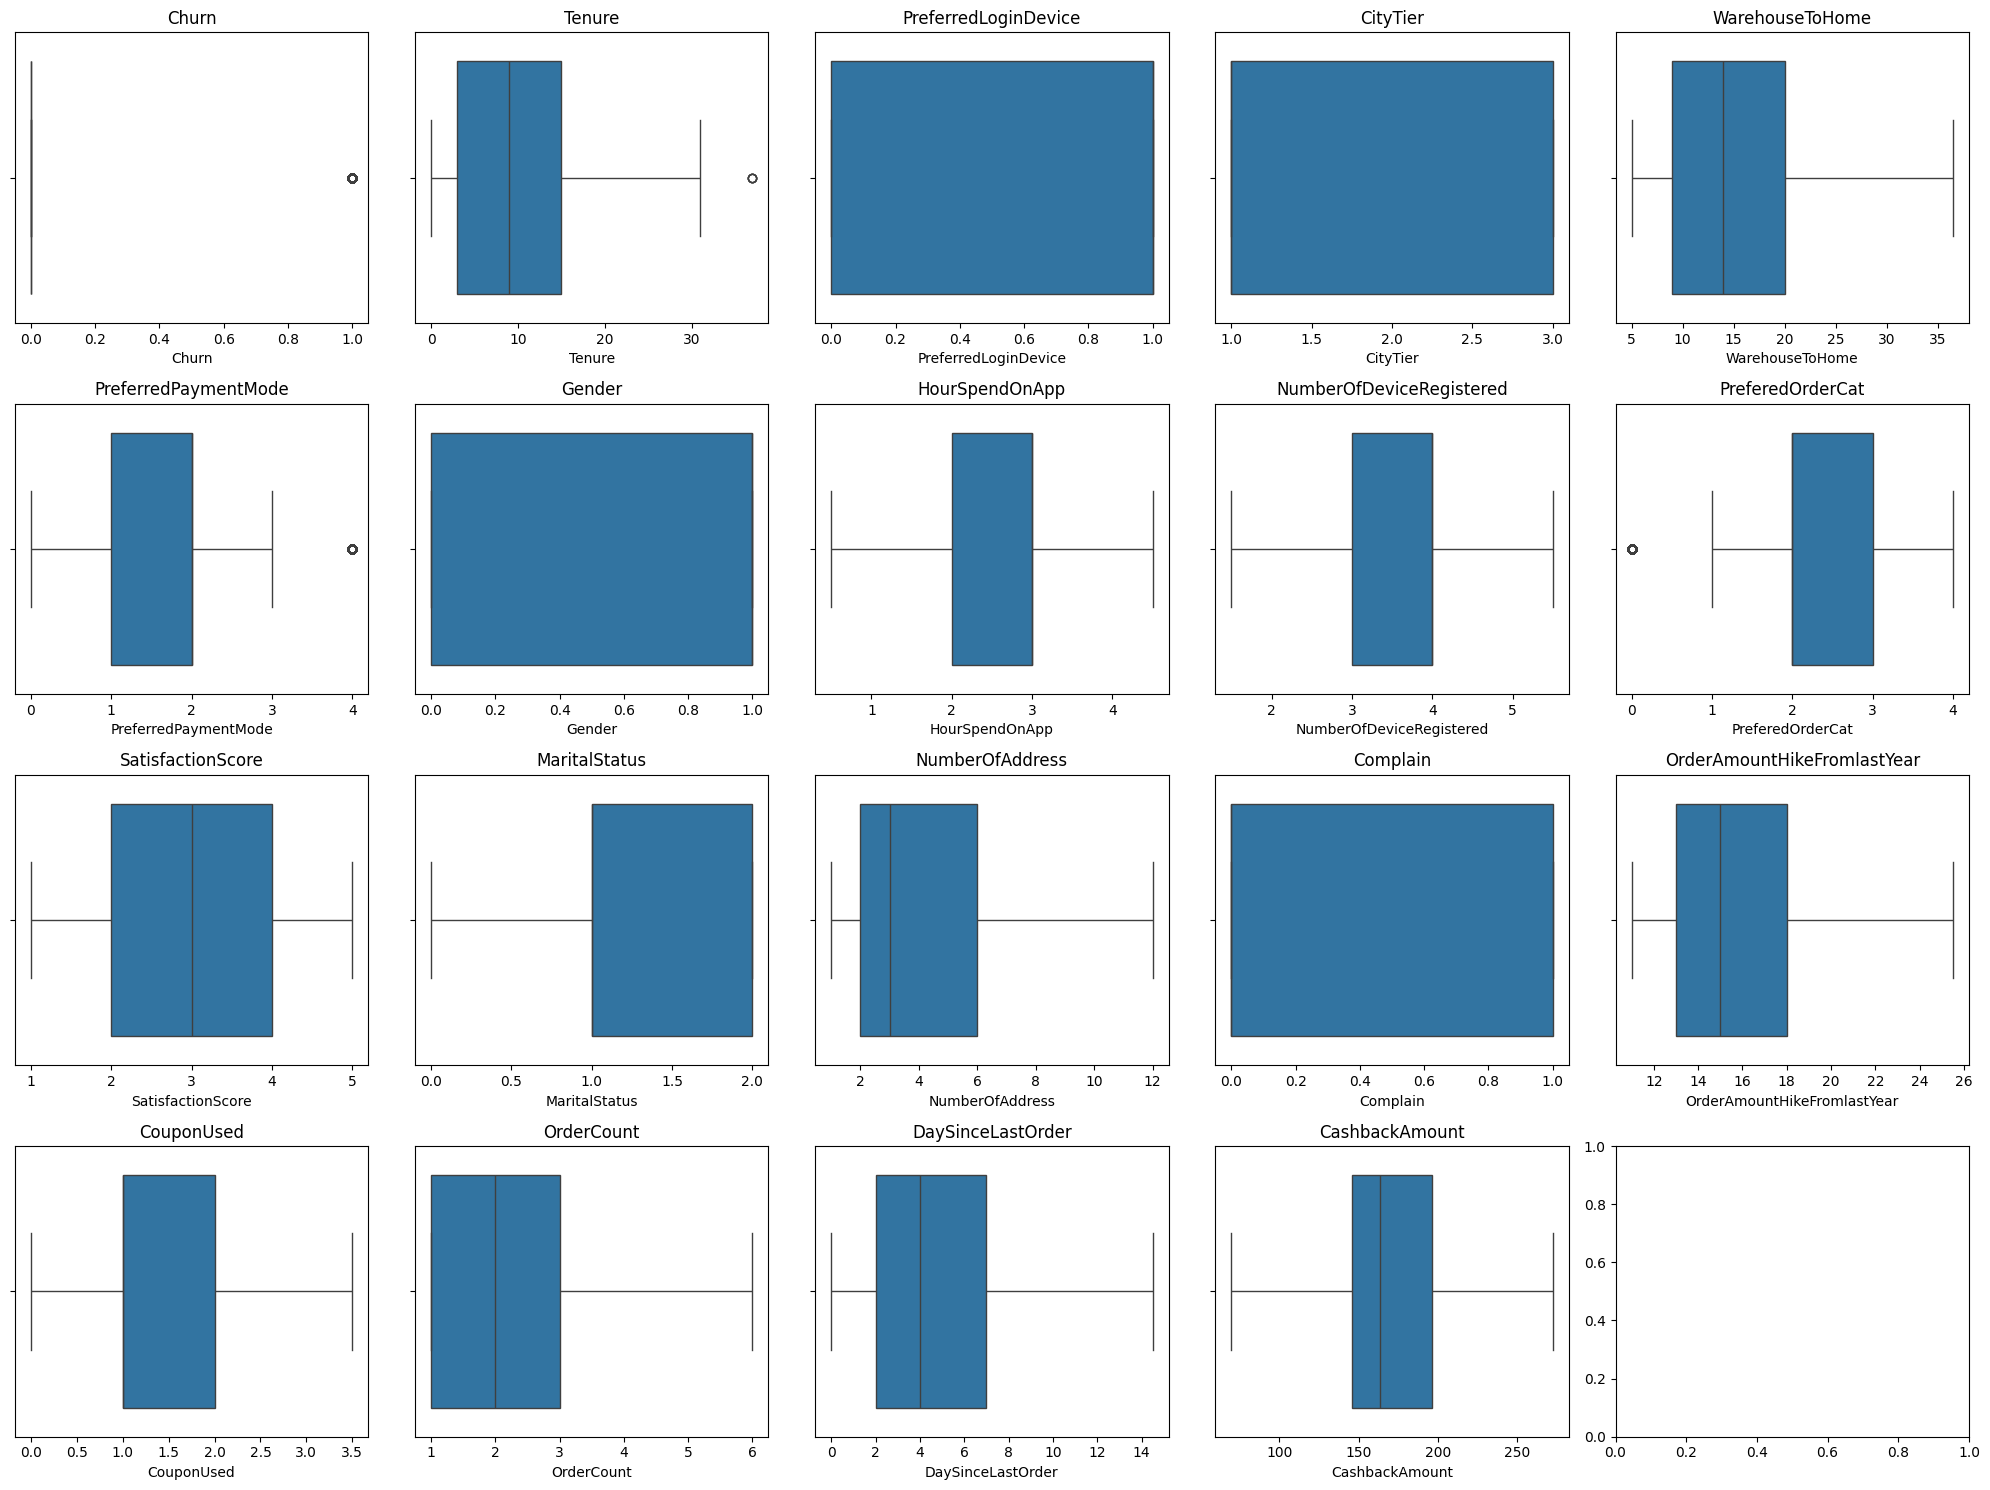

In [ ]:

columns_to_plot = df.columns[:19]  # Select the first 20 columns to plot

# Create subplots with multiple axes
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))

# Flatten axes into a 1D array for easy iteration
axes = axes.flatten()

# Plot each column as a boxplot on a separate axis
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


# Correlation

In [ ]:
corr_matrix = df.corr()

<Axes: >

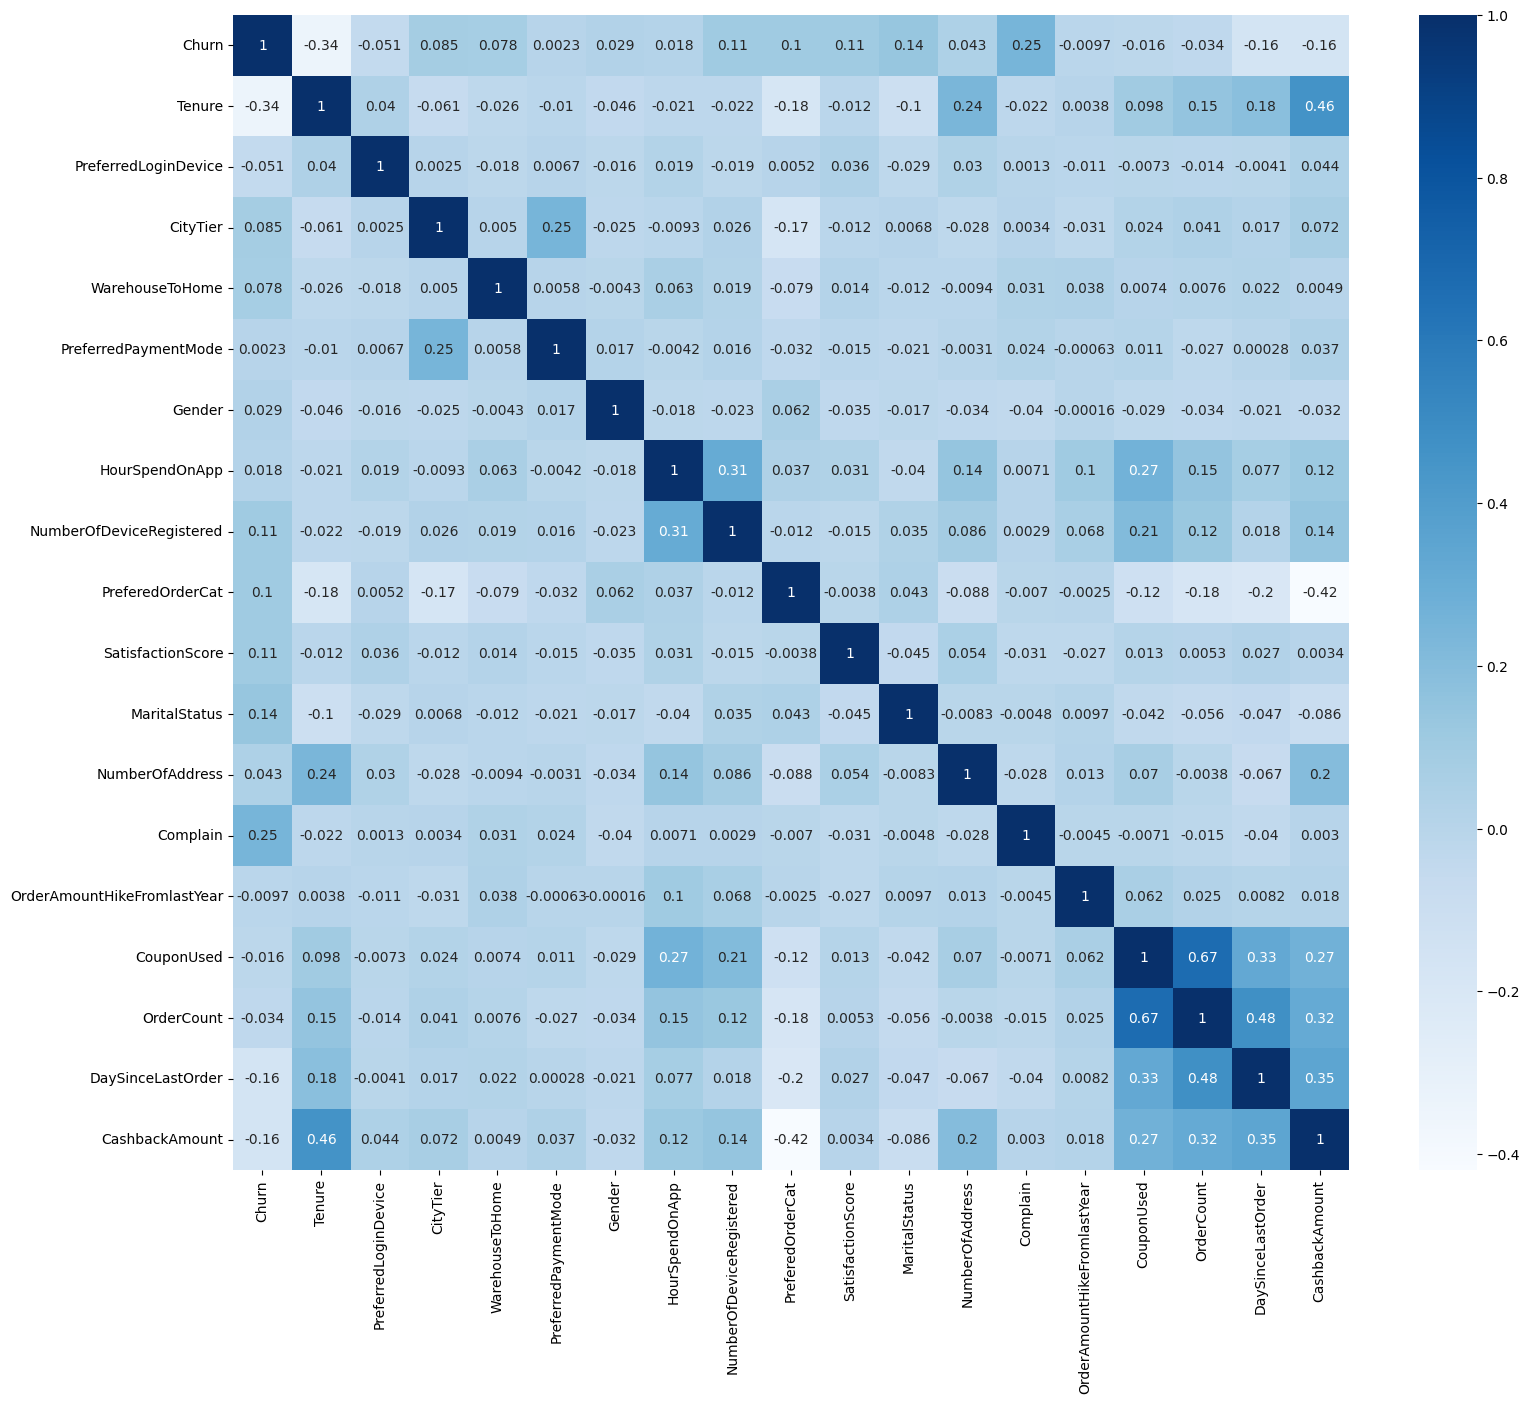

In [ ]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot = True, cmap='Blues')

In [ ]:
churn_corr = corr_matrix['Churn'].sort_values(ascending = False)
churn_corr

Churn                          1.000000
Complain                       0.250188
MaritalStatus                  0.140316
NumberOfDeviceRegistered       0.105669
SatisfactionScore              0.105481
PreferedOrderCat               0.104569
CityTier                       0.084703
WarehouseToHome                0.077528
NumberOfAddress                0.042697
Gender                         0.029264
HourSpendOnApp                 0.018169
PreferredPaymentMode           0.002345
OrderAmountHikeFromlastYear   -0.009724
CouponUsed                    -0.015885
OrderCount                    -0.033758
PreferredLoginDevice          -0.051099
CashbackAmount                -0.160194
DaySinceLastOrder             -0.162833
Tenure                        -0.337176
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Relation Between Features and target')

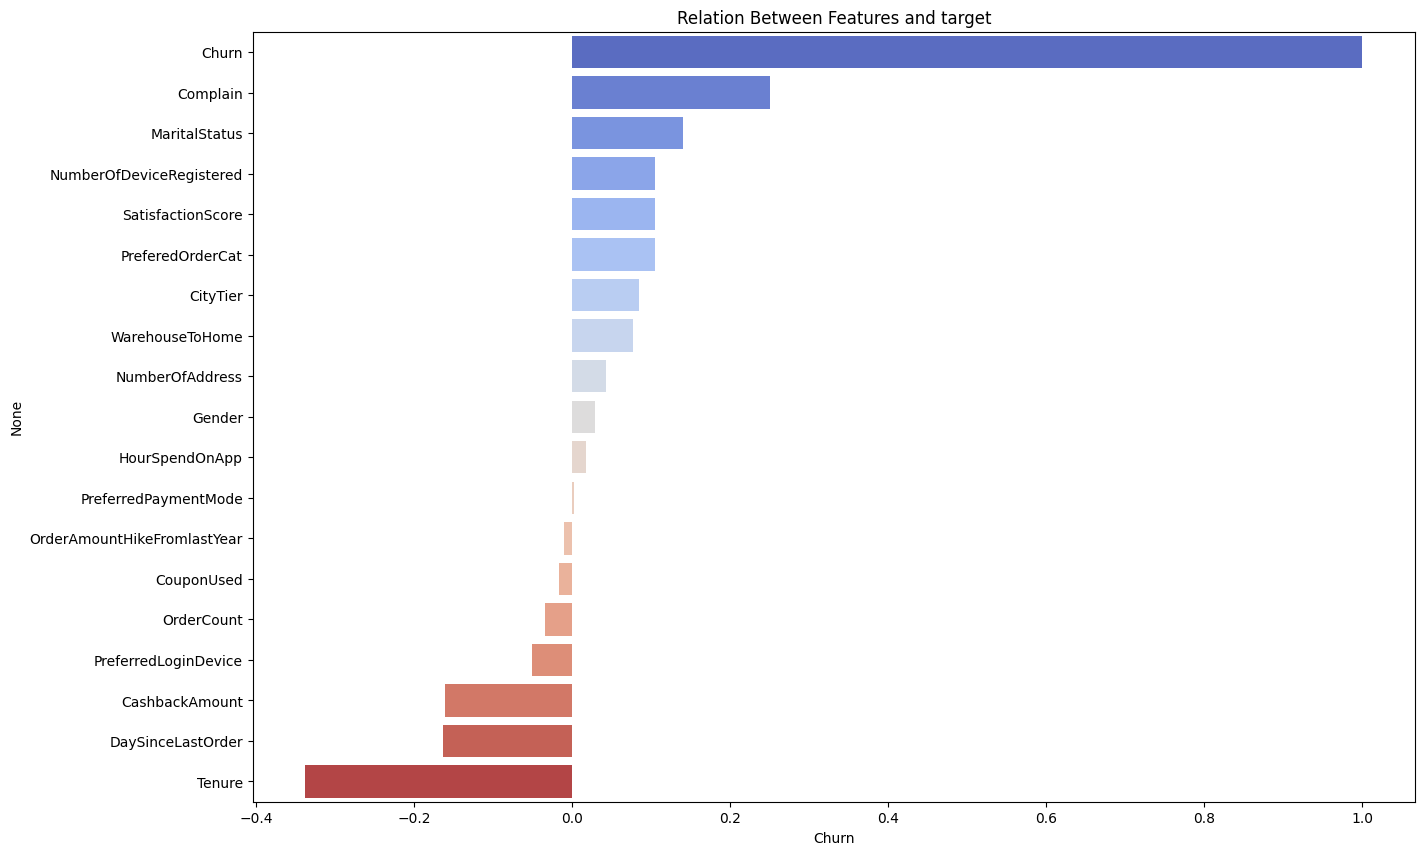

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=churn_corr, y=churn_corr.index, palette='coolwarm')
plt.title('Relation Between Features and target')

### Feature selection

In [ ]:
top_5_features = pd.DataFrame(churn_corr.nlargest(5))

bottom_5_features = pd.DataFrame(churn_corr.nsmallest(5))


In [ ]:
top_5_features.index

Index(['Churn', 'Complain', 'MaritalStatus', 'NumberOfDeviceRegistered',
       'SatisfactionScore'],
      dtype='object')

In [ ]:
bottom_5_features.index

Index(['Tenure', 'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice',
       'OrderCount'],
      dtype='object')

In [ ]:
final_features = ['Churn', 'Complain', 'MaritalStatus', 'NumberOfDeviceRegistered',
       'SatisfactionScore','Tenure', 'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice',
       'OrderCount']

In [ ]:
final_df = df[final_features]

In [ ]:
final_df

,Churn,Complain,MaritalStatus,NumberOfDeviceRegistered,SatisfactionScore,Tenure,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,OrderCount
0,1.0,1.0,2,3.0,2.0,4.000000,5.000000,159.93,1,1.0
1,1.0,1.0,2,4.0,3.0,10.176109,0.000000,120.90,1,1.0
2,1.0,1.0,2,4.0,3.0,10.176109,3.000000,120.28,1,1.0
3,1.0,0.0,2,4.0,5.0,0.000000,3.000000,134.07,1,1.0
4,1.0,0.0,2,3.0,5.0,0.000000,3.000000,129.60,1,1.0
...,...,...,...,...,...,...,...,...,...,...
5625,0.0,0.0,1,2.0,1.0,10.000000,4.000000,150.71,0,2.0
5626,0.0,0.0,1,5.0,5.0,13.000000,4.511554,224.91,1,2.0
5627,0.0,1.0,1,2.0,4.0,1.000000,4.000000,186.42,1,2.0
5628,0.0,0.0,1,5.0,4.0,23.000000,9.000000,178.90,0,2.0


In [ ]:
final_df.head()

In [ ]:
final = final_df.copy()

<Axes: ylabel='Density'>

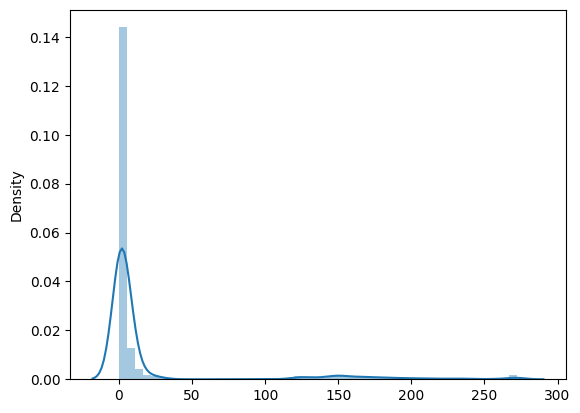

In [ ]:
sns.distplot(final_df)

### Imbalance Target Feature

In [ ]:
fig = px.histogram(df2, x="Churn", color="Churn" ,text_auto= True , title="<b>"'Imbalance Target Feature' , color_discrete_sequence = ['#BA1F33','#3A506B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Churn',
yaxis_title='count',
)
fig.show()

#### Since our dataset exhibits an imbalance, we'll address this by performing oversampling using the SMOTE technique.

# Imbalanced Data

In [ ]:
X = final_df.drop('Churn',axis=1)
y = final_df['Churn']

In [ ]:
final_df['Churn'].value_counts()

0.0    4682
1.0     948
Name: Churn, dtype: int64

In [ ]:
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5625    0.0
5626    0.0
5627    0.0
5628    0.0
5629    0.0
Name: Churn, Length: 5630, dtype: float64

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
X_res.shape, y_res.shape

((9364, 9), (9364,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [ ]:
minmaxscl = MinMaxScaler()
#ss = StandardScaler()
#rs = RobustScaler()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalization
minmaxscl = MinMaxScaler()

X_train_scaled = minmaxscl.fit_transform(X_train)
X_test_scaled = minmaxscl.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()

classifiers = [lr,dt,rf,xgb]
classifiers_name = ['Logistic Regression','Decision Tree','Random Forest','XGBoost']

for clf in classifiers:
  clf.fit(X_train_scaled,y_train)

In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy = []
test_accuracy = []

for clf, name in zip(classifiers,classifiers_name):

  y_pred_train = clf.predict(X_train_scaled)
  y_pred_test = clf.predict(X_test_scaled)

  print(f'{name}')
  print(f"Training Score {clf.score(X_train_scaled,y_train)}")
  print(f"Test Score {clf.score(X_test_scaled,y_test)}")

  print(f"Training Accuracy {accuracy_score(y_train,y_pred_train)}")
  print(f"Test Accuracy {accuracy_score(y_test,y_pred_test)}")

  train_accuracy.append(accuracy_score(y_train,y_pred_train))
  test_accuracy.append(accuracy_score(y_test,y_pred_test))

  print('*'*40)


Logistic Regression
Training Score 0.7868108396742758
Test Score 0.7768286171916711
Training Accuracy 0.7868108396742758
Test Accuracy 0.7768286171916711
****************************************
Decision Tree
Training Score 1.0
Test Score 0.9391350774159103
Training Accuracy 1.0
Test Accuracy 0.9391350774159103
****************************************
Random Forest
Training Score 1.0
Test Score 0.9594233849439402
Training Accuracy 1.0
Test Accuracy 0.9594233849439402
****************************************
XGBoost
Training Score 0.9961286877586437
Test Score 0.9535504538174052
Training Accuracy 0.9961286877586437
Test Accuracy 0.9535504538174052
****************************************


In [ ]:
model_df = pd.DataFrame({'TrainAccuracy ' : train_accuracy,
                         'TestAccuracy ': test_accuracy},
                         index = classifiers_name)

In [ ]:
model_df

,TrainAccuracy,TestAccuracy
Logistic Regression,0.786811,0.776829
Decision Tree,1.000000,0.939135
Random Forest,1.000000,0.959423
XGBoost,0.996129,0.953550


In [ ]:
# Models vs Train Accuracies
#fig = px.bar(model_df, x = model_df['TrainAccuracy'], y = model_df.index ,color=model_df['TrainAccuracy'],
#             title="<b>"+'Models Vs Train Accuracies',text_auto= True , color_continuous_scale='Reds')

fig = px.bar(model_df, x = model_df.iloc[:,0], y = model_df.index ,color=model_df.iloc[:,0],
             title="<b>"+'Models Vs Train Accuracies',text_auto= True , color_continuous_scale='Reds')

fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
                  title_font_color="black",
                  template="plotly",
                  title_font_size=30,
                  hoverlabel_font_size=20,
                  title_x=0.5,
                  xaxis_title='Train Accuracy',
                  yaxis_title='Models Names',
)
fig.show()

In [ ]:
# Models vs Test Accuracies
#fig = px.bar(model_df, x=model_df['TestAccuracy'], y = model_df.index ,color=model_df['TestAccuracy'],
#             title="<b>"+'Models Vs Test Accuracies',text_auto= True , color_continuous_scale='Reds')

fig = px.bar(model_df, x=model_df.iloc[:,1], y = model_df.index ,color=model_df.iloc[:,1],
             title="<b>"+'Models Vs Test Accuracies',text_auto= True , color_continuous_scale='Reds')


fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Test Accuracy',
yaxis_title='Models Names',
)
fig.show()

### From the graphs, we observe that the best-performing models in both the training and testing sets are Random Forest and XGBoost.

In [ ]:
#!pip install mlxtend

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, classification_report,RocCurveDisplay

Accuracy = 0.9604911906033102
ROC Area under Curve = 0.9604823574215589
              precision    recall  f1-score   support

         0.0    0.95767   0.96379   0.96072       939
         1.0    0.96336   0.95717   0.96026       934

    accuracy                        0.96049      1873
   macro avg    0.96052   0.96048   0.96049      1873
weighted avg    0.96051   0.96049   0.96049      1873



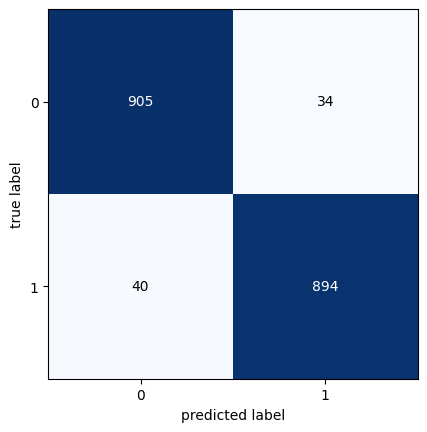

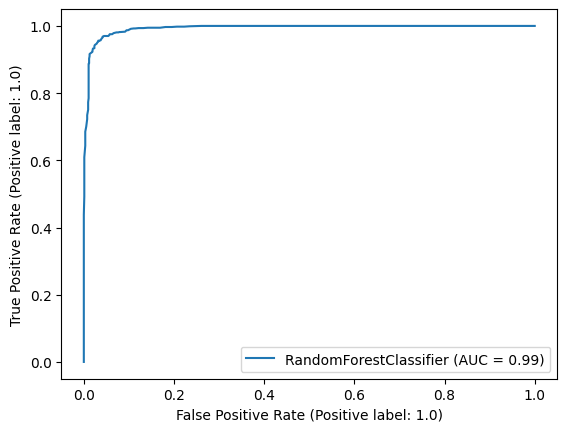

In [ ]:
# random forest

from sklearn.metrics import confusion_matrix

model1 = RandomForestClassifier()
model1.fit(X_train_scaled,y_train)
y_pred = model1.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc4 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc4))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
#RocCurveDisplay.from_estimator(model1 , X_test_scaled , y_test)

Accuracy = 0.9535504538174052
ROC Area under Curve = 0.9535401459021737
              precision    recall  f1-score   support

         0.0    0.95032   0.95740   0.95385       939
         1.0    0.95685   0.94968   0.95325       934

    accuracy                        0.95355      1873
   macro avg    0.95358   0.95354   0.95355      1873
weighted avg    0.95357   0.95355   0.95355      1873



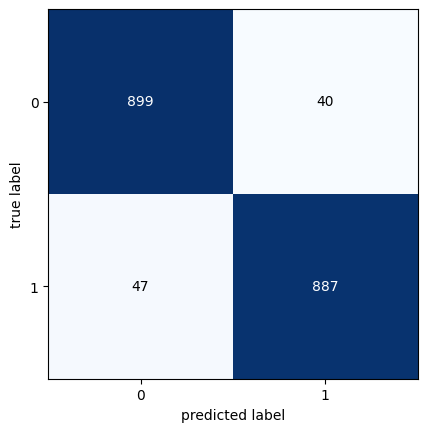

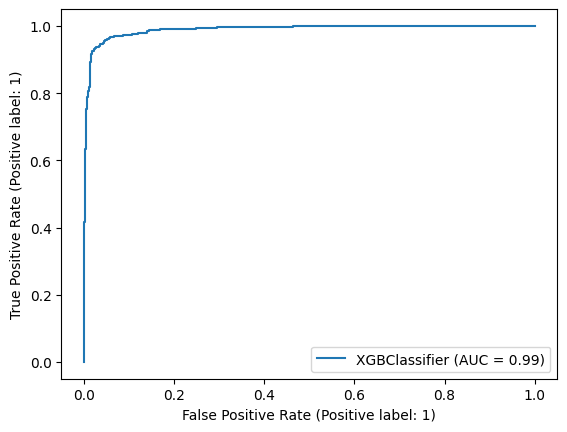

In [ ]:
# XGBoost
from sklearn.metrics import confusion_matrix

model2 = XGBClassifier()
model2.fit(X_train_scaled,y_train)
y_pred = model2.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc5 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc5))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
#RocCurveDisplay.from_estimator(model2 , X_test_scaled , y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

xgb = XGBClassifier()

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy = {:.5f}".format(accuracy))
print("ROC Area under Curve = {:.5f}".format(roc_auc))
print(classification_report(y_test, y_pred, digits=5))

plt.show()

# Plot confusion matrix
#plot_confusion_matrix(best_model, X_test_scaled, y_test)

# Plot ROC curve
#roc_display = RocCurveDisplay.from_estimator(best_model, X_test_scaled, y_test)
#roc_display.plot()



Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=5, n_es

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}

## Pickle File

In [ ]:
import pickle

In [ ]:
pickle.dump(model1,open('randomforestmodel','wb'))

pickle.dump(xgb,open('xgboostmodel.pkl','wb'))

pickle.dump(minmaxscl,open('scaler.pkl','wb'))



# Recommendations & Conclusion
• Should consider that the higher percntage are males incresing the products that grap the males interest and so on.
May be the comapny should consider taking care of the products that suits the single and the married customers as the single are more likly to churn

• The company should consider the products that not that expensive or that cheap so that the medium city tier 2 can trust buying it cause as a medium tier customer i wo't afford buying expensive products and i won't trust buying cheap products as they won't meet my needs

• The company should think of another technique other than satisfaction score or complaining may be a hot line to recive the complains to get fast results or provied regular phone calls to recive feedback from the customers

• The company should check the mobile version of the store to see if there is any problem with the ui/ux

• Once the customer has reached 12% -15% orderamount the company should consider focusing more on grap their attention with the products they like

• For customers who have just bought electronic goods, cross-selling can be done by offering electronic accessories, such as keyboards, mice, etc.